<h1>
<center> Exploratory Data Analysis </center></h1>

### Business Context:  
Increasing employee attrition rate is posing as a serious threat to software
companies in USA. One of our clients who is facing a similar issue, ha 
reached out to us to provide a solution for this, by employing Analytics ad 
Machine Learning.

#### Import the important packages :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Import the Data Sets :

In [2]:
Emp1_demo = pd.read_csv("E:\Data Set Employee\Employee Demographics.csv")
Emp1_demo.head()

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18
0,1,41.0,College,Life Sciences,Female,Single,Y
1,2,49.0,Below College,Life Sciences,Male,Married,Y
2,4,37.0,College,Other,Male,Single,Y
3,5,33.0,Master,Life Sciences,Female,Married,Y
4,7,27.0,Below College,Medical,Male,Married,Y


In [3]:
Emp1_job_info = pd.read_csv("E:\Data Set Employee\Employee Job Info.csv")
Emp1_job_info.head()

,EmployeeNumber,Department,BusinessTravel,DistanceFromHome,JobInvolvement,JobLevel,JobRole,MonthlySalary,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,103,Human Resources,Travel_Rarely,5,High,2.0,Human Resources,5021.0,8.0,Yes,22.0,Outstanding,1.0,2,4,2,0,2
1,133,Human Resources,Travel_Rarely,6,High,1.0,Human Resources,2073.0,4.0,Yes,22.0,Outstanding,0.0,3,3,2,0,2
2,140,Human Resources,Non-Travel,2,Medium,5.0,Manager,18844.0,9.0,No,21.0,Outstanding,1.0,3,3,2,2,2
3,148,Human Resources,Non-Travel,26,Very High,4.0,Manager,17328.0,NaN,Yes,12.0,Excellent,0.0,3,5,3,4,4
4,177,Human Resources,Travel_Rarely,25,High,1.0,Human Resources,2942.0,1.0,No,23.0,Outstanding,1.0,3,8,7,5,7


In [4]:
Emp1_sats_sur = pd.read_csv("E:\Data Set Employee\Emp_Satisfaction_Survey_info.csv")
Emp1_sats_sur.head()

,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance
0,2,High,Medium,Medium,Very High,Better
1,10,High,Very High,Low,Low,Good
2,13,High,High,High,Medium,Good
3,19,High,Medium,High,Medium,Better
4,27,High,Medium,Low,Medium,Better


In [5]:
Emp1_attr = pd.read_csv("E:\Data Set Employee\Employee Attrition Details1.csv")
Emp1_attr.head()

,EmployeeNumber,Attrition
0,1,Yes
1,4,Yes
2,19,Yes
3,27,Yes
4,31,Yes


#### 2. Perform detailed data checks (missing values, outliers, duplicates, special characters ($, #, #NA, #error, #Name, Currencies, Null values,?,@ Inf, -inf, #error,  #value…etc…), mis-match in data types, renaming required for variables, format of data (specially dates), Identify unique id/Unique identifier or key variables (primary key/foreign key)  in the data, is data encoded etc...). List out all possible problems in the data

In [6]:
# Checking missing values :

def check_missing_values(df) :
    return df.isnull().sum()

# Apply :
print("Missing values in data1:\n" , check_missing_values(Emp1_demo))
print("Missing values in data2:\n", check_missing_values(Emp1_job_info))
print("Missing values in data3:\n" ,check_missing_values(Emp1_sats_sur))
print("Missing values in data4:\n" ,check_missing_values(Emp1_attr ))


Missing values in data1:
 EmployeeNumber    0
Age               4
Education         5
EducationField    8
Gender            3
MaritalStatus     3
Over18            6
dtype: int64
Missing values in data2:
 EmployeeNumber                 0
Department                     0
BusinessTravel                 0
DistanceFromHome               0
JobInvolvement                 1
JobLevel                       1
JobRole                        1
MonthlySalary                  3
NumCompaniesWorked             3
OverTime                       1
PercentSalaryHike_last_year    1
PerformanceRating              1
StockOptionLevel               2
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
dtype: int64
Missing values in data3:
 EmployeeNumber                      0
EnvironmentSatisfaction             0
JobInvolvement                      0
JobSatisfaction                     0
Manager_Re

In [7]:
def check_special_characters(df):
    special_chars = ['$', '#', '#NA', '#error', '#Name', '?', '@', 'Inf', '-Inf', '#value']
    results = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            for char in special_chars:
                if df[col].str.contains(re.escape(char), na=False).any():
                    if col not in results:
                        results[col] = []
                    results[col].append(char)
    return results

# Checking special characters in each DataFrame
results1 = check_special_characters(Emp1_demo)
results2 = check_special_characters(Emp1_job_info)
results3 = check_special_characters(Emp1_sats_sur)
results4 = check_special_characters(Emp1_attr)

print("Special Characters in Employee data1:", results1)
print("Special Characters in Employee data2:", results2)
print("Special Characters in Employee data3:", results3)
print("Special Characters in Employee data4:", results4)


# Checking for outliers:

# We will use the IQR method to detect outliers for numerical columns
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

num_cols1 = Emp1_demo.select_dtypes(include = [np.number]).columns.tolist()
num_cols2 = Emp1_job_info.select_dtypes(include = [np.number]).columns.tolist()
num_cols3 = Emp1_sats_sur.select_dtypes(include = [np.number]).columns.tolist()
num_cols4 = Emp1_attr.select_dtypes(include = [np.number]).columns.tolist()

outliers = detect_outliers(Emp1_demo, num_cols1)
for col, outlier_data in outliers.items():
    print(f"\nOutliers in column '{col}':")
    print(outlier_data)

outliers = detect_outliers(Emp1_job_info, num_cols2)
for col, outlier_data in outliers.items():
    print(f"\nOutliers in column '{col}':")
    print(outlier_data)

outliers = detect_outliers(Emp1_sats_sur, num_cols3)
for col, outlier_data in outliers.items():
    print(f"\nOutliers in column '{col}':")
    print(outlier_data)

outliers = detect_outliers(Emp1_attr, num_cols4)
for col, outlier_data in outliers.items():
    print(f"\nOutliers in column '{col}':")
    print(outlier_data)

# Checking for duplicates:

print("Duplicates values of data1:",Emp1_demo.duplicated().sum())
print("Duplicates values of data2:",Emp1_job_info.duplicated().sum())
print("Duplicates values of data3:",Emp1_sats_sur.duplicated().sum())
print("Duplicates values of data4:",Emp1_attr.duplicated().sum())

Special Characters in Employee data1: {}
Special Characters in Employee data2: {}
Special Characters in Employee data3: {}
Special Characters in Employee data4: {}

Outliers in column 'EmployeeNumber':
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []

Outliers in column 'Age':
Empty DataFrame
Columns: [EmployeeNumber, Age, Education, EducationField, Gender, MaritalStatus, Over18]
Index: []

Outliers in column 'EmployeeNumber':
Empty DataFrame
Columns: [EmployeeNumber, Department, BusinessTravel, DistanceFromHome, JobInvolvement, JobLevel, JobRole, MonthlySalary, NumCompaniesWorked, OverTime, PercentSalaryHike_last_year, PerformanceRating, StockOptionLevel, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

Outliers in column 'DistanceFromHome':
    EmployeeNumber       Department     BusinessTravel  DistanceFromHome  \
10             590  Human Resources  

In [8]:
# Check data types:

print("Data types of data1:""\n",Emp1_demo.dtypes)
print("Data types of data2:""\n",Emp1_job_info.dtypes)
print("Data types of data3:""\n",Emp1_sats_sur.dtypes)
print("Data types of data4:""\n",Emp1_attr.dtypes)

Data types of data1:
 EmployeeNumber      int64
Age               float64
Education          object
EducationField     object
Gender             object
MaritalStatus      object
Over18             object
dtype: object
Data types of data2:
 EmployeeNumber                   int64
Department                      object
BusinessTravel                  object
DistanceFromHome                 int64
JobInvolvement                  object
JobLevel                       float64
JobRole                         object
MonthlySalary                  float64
NumCompaniesWorked             float64
OverTime                        object
PercentSalaryHike_last_year    float64
PerformanceRating               object
StockOptionLevel               float64
TrainingTimesLastYear            int64
YearsAtCompany                   int64
YearsInCurrentRole               int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
dtype: object
Data types of data3:
 EmployeeNumber        

* Renaming Columns:

        There is no requirement to rename the columns. It is easy to understand.

## Formatting_Data_ types(especially date )

          There are no date columns in above data sets. So there are no requirement to change.

In [9]:
# Check for unique identifier columns
unique_ids = Emp1_demo['EmployeeNumber'].nunique()
total_rows = len(Emp1_demo)

if unique_ids == total_rows:
    print('Employee_Number is a unique identifier')
else:
    print('Employee_Number is not a unique identifier')

Employee_Number is a unique identifier


In [10]:
# Check if any columns are encoded (e.g., categorical variables encoded as integers)
encoded_columns1 = Emp1_demo.select_dtypes(include=['int64']).columns
encoded_columns2 = Emp1_job_info.select_dtypes(include=['int64','float64']).columns
encoded_columns3 = Emp1_sats_sur.select_dtypes(include=['int64','float64']).columns
encoded_columns4 = Emp1_attr.select_dtypes(include=['int64','float64']).columns

for col in encoded_columns1:
    unique_values = Emp1_demo[col].nunique()
    if unique_values < 10:  # Assuming columns with fewer unique values might be encoded
        print(f'Column {col} might be an encoded categorical variable with {unique_values} unique values')


for col in encoded_columns2:
    unique_values = Emp1_job_info[col].nunique()
    if unique_values < 10:  # Assuming columns with fewer unique values might be encoded
        print(f'Column {col} might be an encoded categorical variable with {unique_values} unique values')


for col in encoded_columns3:
    unique_values = Emp1_sats_sur[col].nunique()
    if unique_values < 10:  # Assuming columns with fewer unique values might be encoded
        print(f'Column {col} might be an encoded categorical variable with {unique_values} unique values')


for col in encoded_columns4:
    unique_values = Emp1_attr[col].nunique()
    if unique_values < 10:  # Assuming columns with fewer unique values might be encoded
        print(f'Column {col} might be an encoded categorical variable with {unique_values} unique values')

Column JobLevel might be an encoded categorical variable with 5 unique values
Column StockOptionLevel might be an encoded categorical variable with 4 unique values
Column TrainingTimesLastYear might be an encoded categorical variable with 7 unique values


#### 3. Join (merged) all the data frames (base table as employee demographics table) and name the final table as 'final_data'

In [11]:
final_data = pd.merge(Emp1_demo , Emp1_job_info ,on = 'EmployeeNumber', how = 'left' )
final_data = pd.merge(final_data , Emp1_sats_sur , on = 'EmployeeNumber', how = 'left')
final_data = pd.merge(final_data , Emp1_attr , on = 'EmployeeNumber', how = 'left')
final_data

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,6,4,0,5,Medium,High,Very High,Low,Bad,Yes
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,10,7,1,7,High,Medium,Medium,Very High,Better,No
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,0,Very High,Medium,High,Medium,Better,Yes
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,8,7,3,0,Very High,High,High,High,Better,No
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,2,2,2,2,Low,High,Medium,Very High,Better,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23,...,5,2,0,3,High,Very High,Very High,High,Better,No
1466,2062,39.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,6,...,7,7,1,7,Very High,Medium,Low,Low,Better,No
1467,2064,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4,...,6,2,0,3,Medium,Very High,Medium,Medium,Better,No
1468,2065,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2,...,9,6,0,8,Very High,Medium,Medium,Very High,Good,No


In [12]:
final_data.to_csv(r"C:\Users\kumar\Downloads\final_data.csv",index = False)

#### 4. Find the distinct values in each variable in the joined data set -(Note: You should create user defined function for the same

In [13]:
def distinct_values(df):
    distinct_values = {}
    for column in df.columns:
        distinct_values[column] = df[column].unique()
    return distinct_values
distinct_values = distinct_values(final_data)

# Display distinct values for each column
for column, values in distinct_values.items():
    print(f"Column: {column}\nDistinct Values: {values}\n")

Column: EmployeeNumber
Distinct Values: [   1    2    4 ... 2064 2065 2068]

Column: Age
Distinct Values: [41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. 22. 53. 24.
 21. 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. nan 47. 18. 60.]

Column: Education
Distinct Values: ['College' 'Below College' 'Master' 'Bachelor' nan 'Doctor']

Column: EducationField
Distinct Values: ['Life Sciences' 'Other' 'Medical' nan 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Distinct Values: ['Female' 'Male' nan]

Column: MaritalStatus
Distinct Values: ['Single' 'Married' 'Divorced' nan]

Column: Over18
Distinct Values: ['Y' nan]

Column: Department
Distinct Values: ['Sales' 'Research & Development' 'Human Resources']

Column: BusinessTravel
Distinct Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: DistanceFromHome
Distinct Values: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 1

#### 5. Find below metrics for numerical columnsNumber of values, number of missing's, number of distinct values, number of zeros, sum, mean, median, std, variance, min, max, range, P1, P5, P10, P25, P50, P75, P90, P95, P99 (Note: You should create user defined function for the same)

In [14]:
Numerical_data = final_data.select_dtypes(['int64','float64'])

def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]                # number of rows
    n_miss = x.isna().sum()             # count of missing values
    perc_miss = n_miss * 100 / n_total  # %age of missing values
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(),x.var(),(x.max() - x.min()),
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean' ,'std','var','range',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 
continuous_summ = Numerical_data.apply(continuous_var_summary)
continuous_summ

,EmployeeNumber,Age,DistanceFromHome,JobLevel,MonthlySalary,NumCompaniesWorked,PercentSalaryHike_last_year,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
dtype,int64,float64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
cardinality,1470,43,31,5,1346,10,15,4,7,37,19,16,18
n_tot,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
n,1470,1466,1470,1469,1467,1467,1469,1468,1470,1470,1470,1470,1470
nmiss,0,4,0,1,3,3,1,2,0,0,0,0,0
perc_miss,0.0,0.272109,0.0,0.068027,0.204082,0.204082,0.068027,0.136054,0.0,0.0,0.0,0.0,0.0
sum,1506552,54111.0,13574,3033.0,9792156.0,3952.0,22346.0,1166.0,4115,10302,6217,3216,6061
mean,1024.865306,36.910641,9.234014,2.06467,6674.952965,2.693933,15.211709,0.794278,2.79932,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.137228,8.263673,1.106968,6822.25707,2.498782,3.660225,0.852388,1.289271,6.126525,3.623137,3.22243,3.568136
var,362433.299749,83.488938,68.288291,1.225379,46543191.522343,6.243913,13.397247,0.726566,1.662219,37.53431,13.127122,10.384057,12.731595


#### 6. Find below metrics for categorical columnsNumber of values, number of missing's, number of distinct values, Frequency for each category(Note: You should create user defined function for the same) 

In [15]:
Categorical_data = final_data.select_dtypes('object')
def categorical_var_summary( x ):

    # freq and missing
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    per_miss = n_miss * 100 / n_total

    # Distinct Categories:
    distinct_categories = x.value_counts()

    return pd.Series([ x.dtype ,distinct_categories ,  n_total , n_miss , per_miss  ],
                    index = ['dtype' , 'Distinct Categories with frequency','Total_number','Missing_number','Per_missing'])

Categorical_summ = Categorical_data.apply(categorical_var_summary)
Categorical_summ

,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,JobInvolvement_x,JobRole,OverTime,PerformanceRating,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
Distinct Categories with frequency,Education Bachelor 569 Master ...,EducationField Life Sciences 605 Medical...,Gender Male 880 Female 587 Name: count...,MaritalStatus Married 673 Single 469 ...,"Over18 Y 1464 Name: count, dtype: int64",Department Research & Development 961 Sales...,BusinessTravel Travel_Rarely 1043 Trave...,JobInvolvement_x High 867 Medium ...,JobRole Sales Executive 326 Resea...,"OverTime No 1053 Yes 416 Name: count, ...",PerformanceRating Excellent 1243 Outstand...,EnvironmentSatisfaction High 453 Very ...,JobInvolvement_y High 868 Medium ...,JobSatisfaction Very High 459 High ...,Manager_RelationshipSatisfaction High ...,WorkLifeBalance Better 893 Good 344 Be...,"Attrition No 1233 Yes 237 Name: count,..."
Total_number,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
Missing_number,5,8,3,3,6,0,0,1,1,1,1,0,0,0,0,0,0
Per_missing,0.340136,0.544218,0.204082,0.204082,0.408163,0.0,0.0,0.068027,0.068027,0.068027,0.068027,0.0,0.0,0.0,0.0,0.0,0.0


#### 7. Plot the histograms for all numerical variables(Note: You should create user defined function for the same)

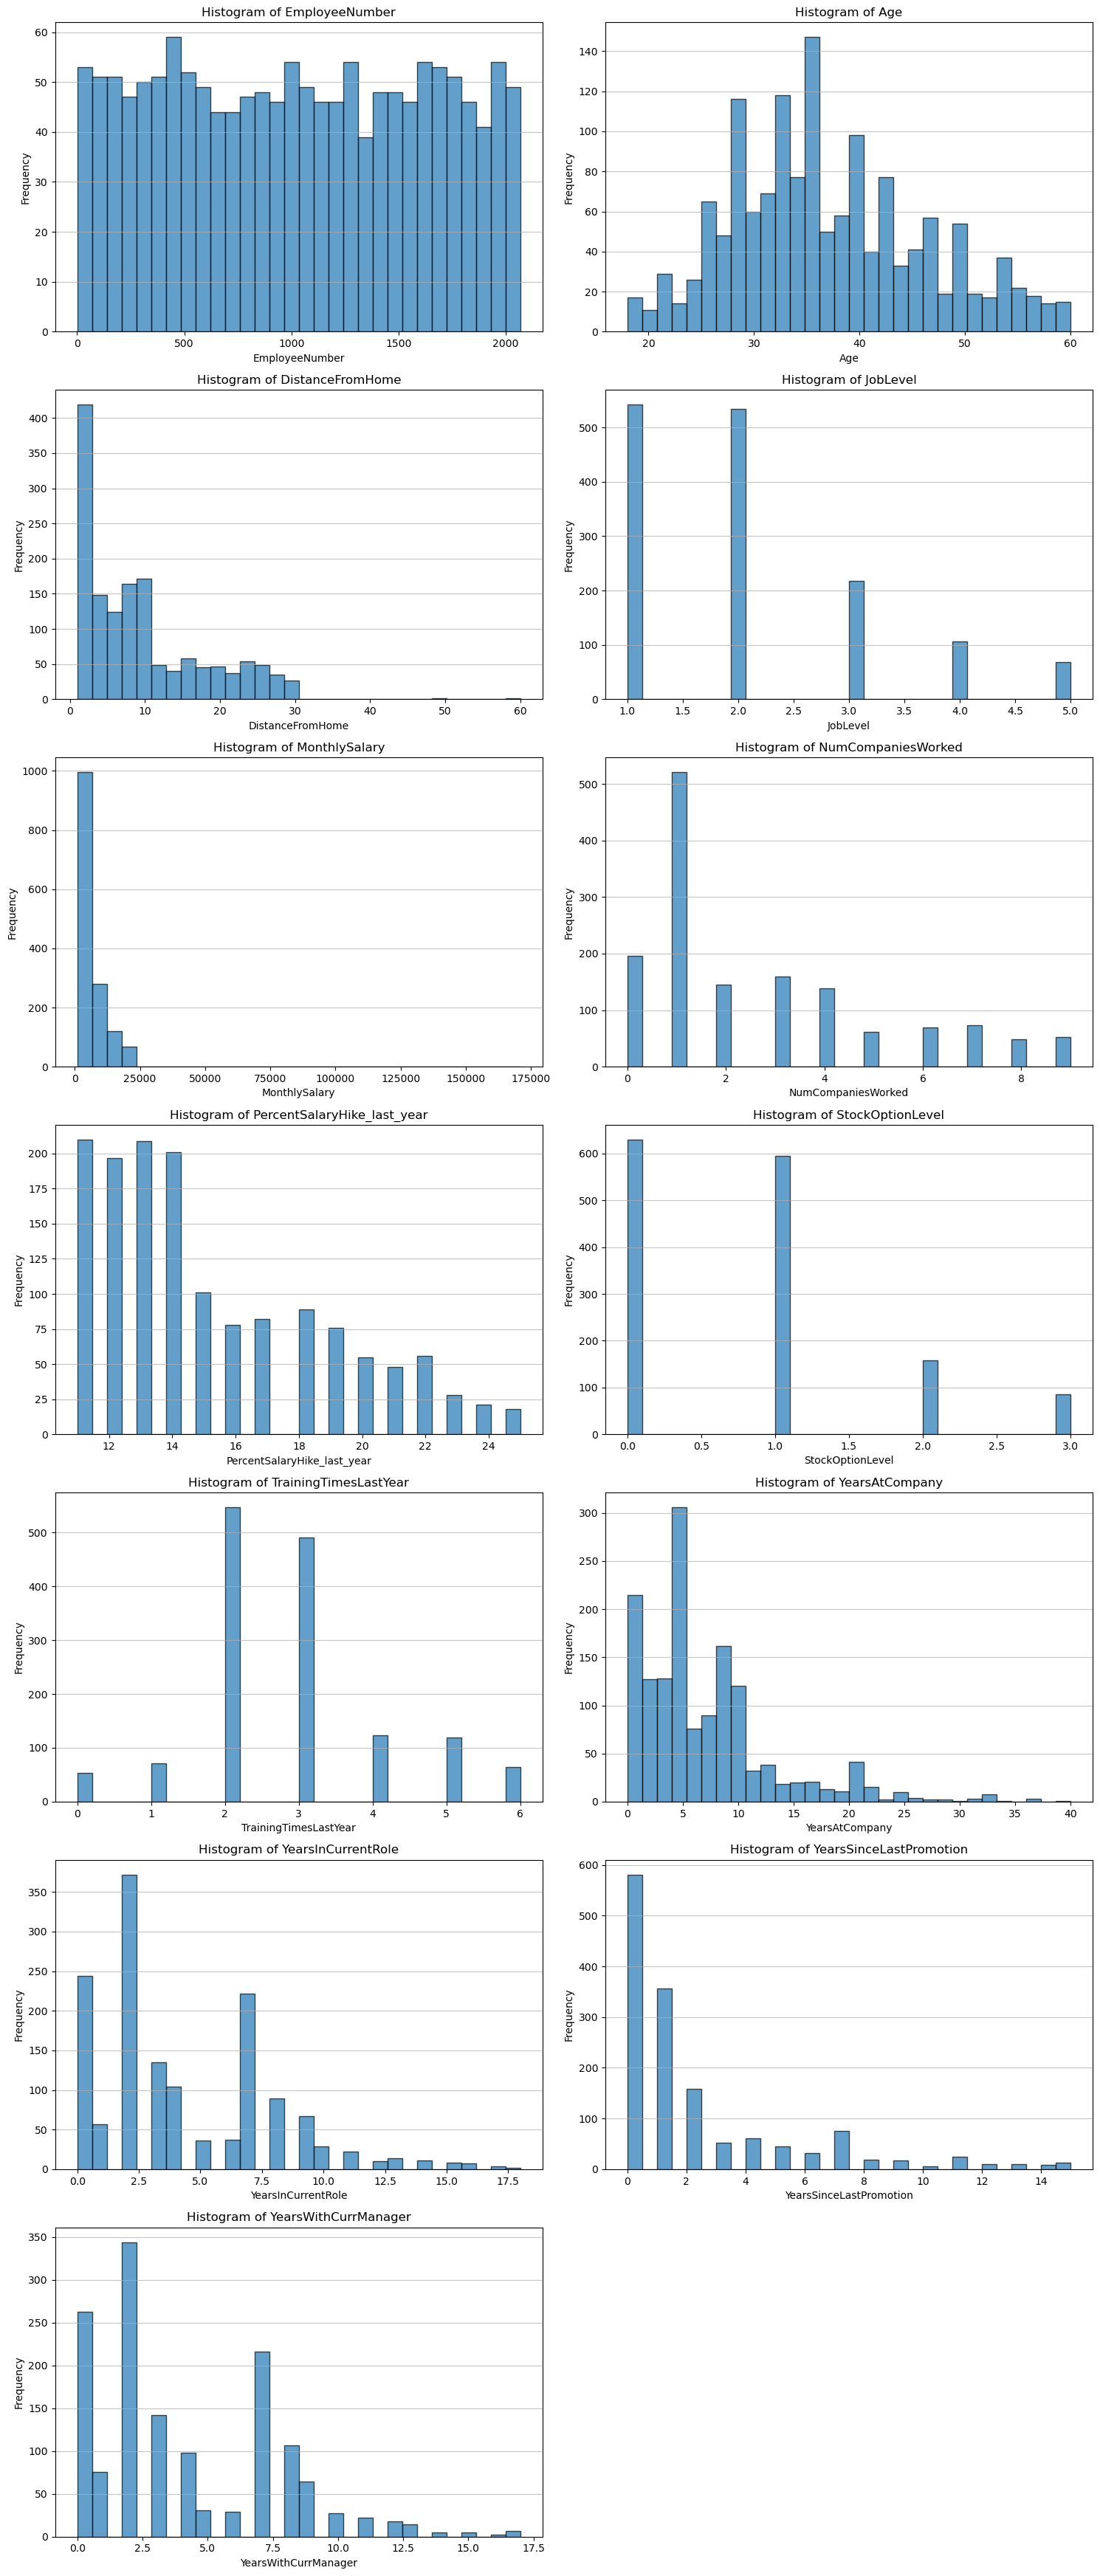

In [16]:
def plot_histograms(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numerical_columns:
        print("No numerical columns to plot.")
        return
    
    # Plot histograms for each numerical column
    num_plots = len(numerical_columns)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed
    
    plt.figure(figsize=(15, num_rows * 5))
    
    for i, col in enumerate(numerical_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.hist(df[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
    
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# Plot histograms for the final_data DataFrame
plot_histograms(final_data)

## 8. Plot the bar charts for all categorical variables (Note: Plot the frequency of each category in the categorical variables. You should create user defined function for the same)

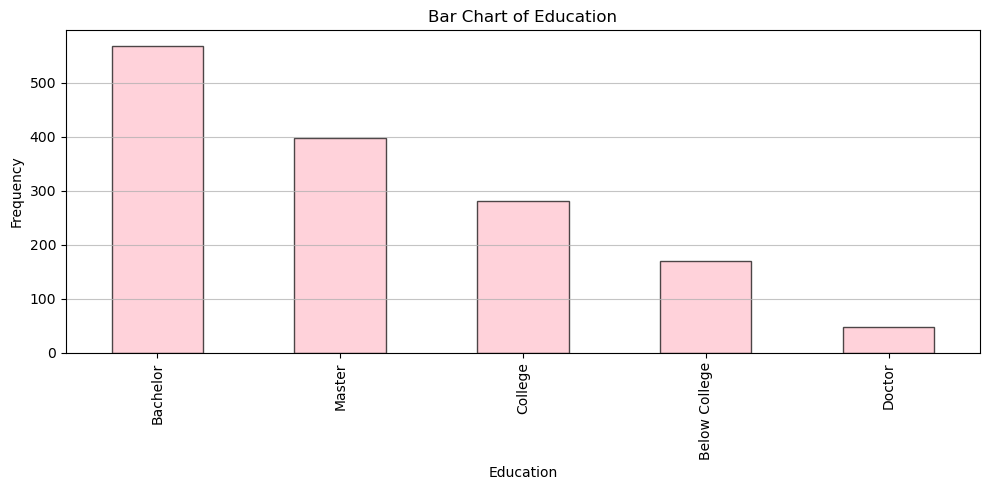

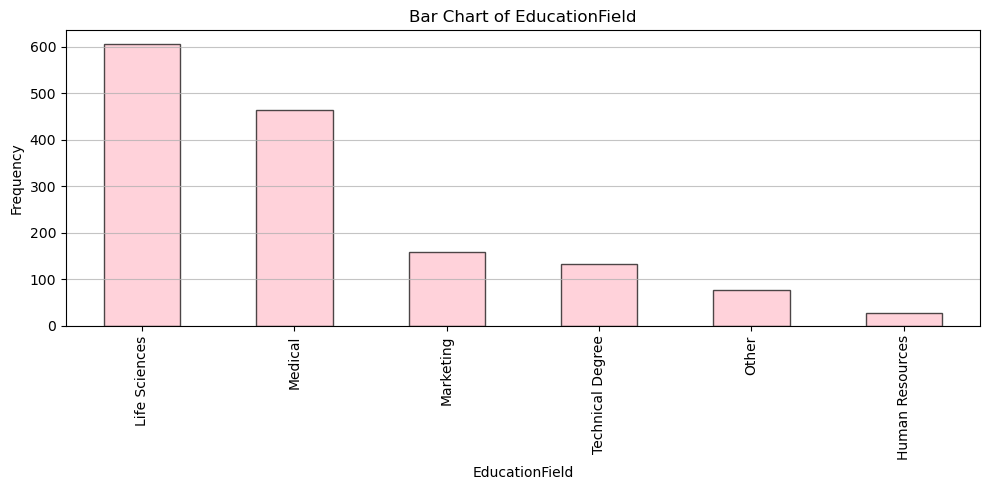

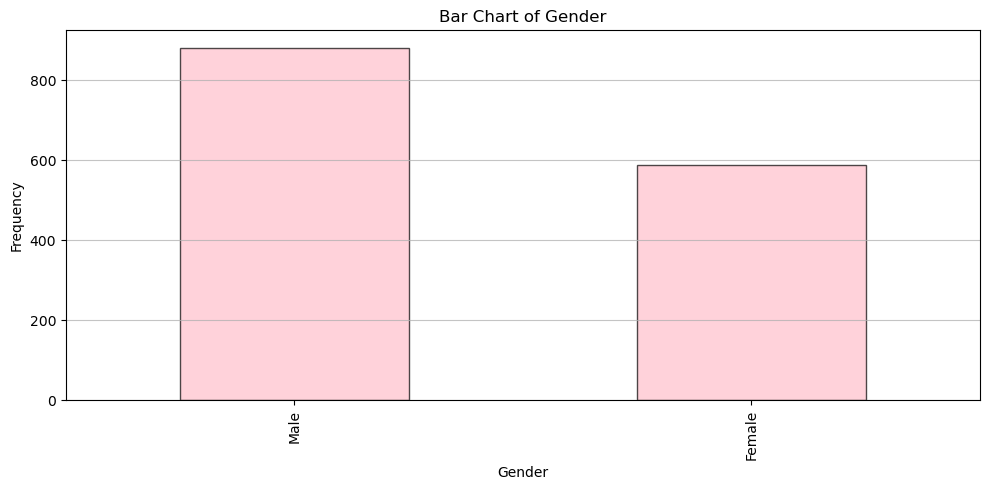

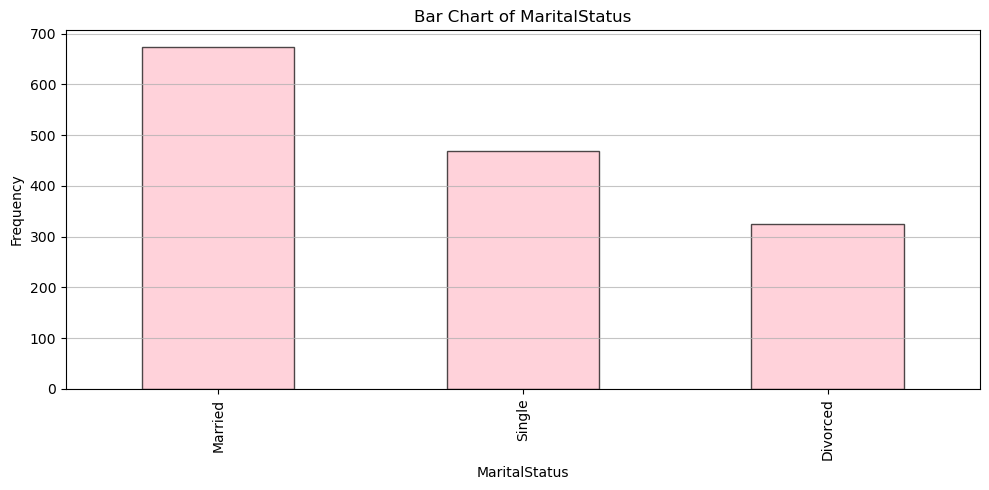

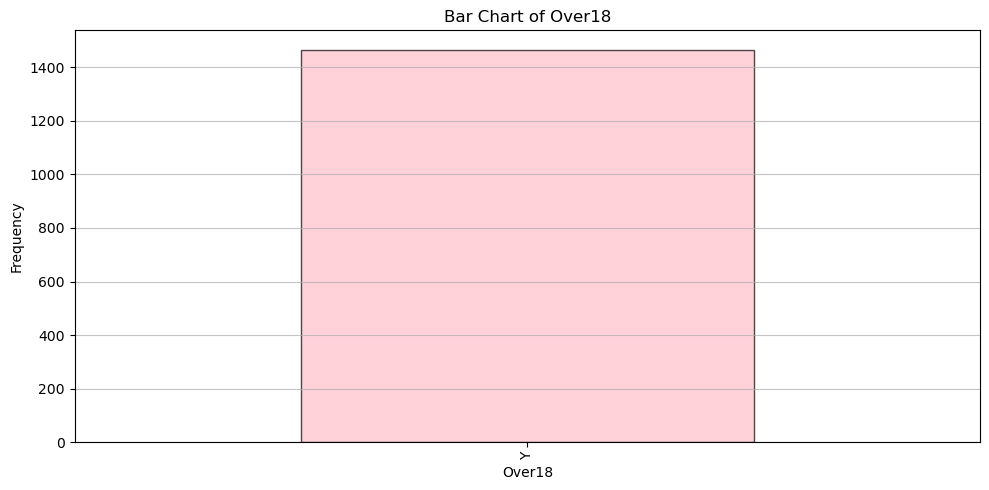

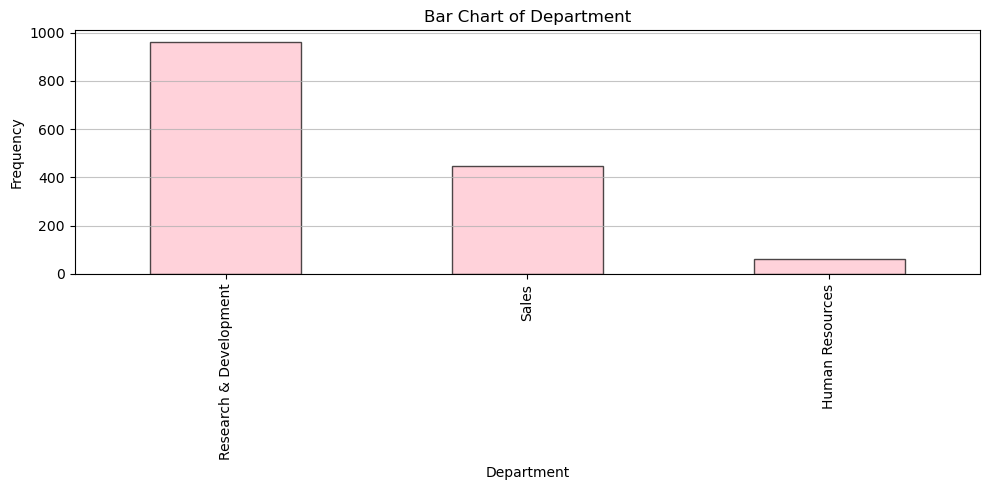

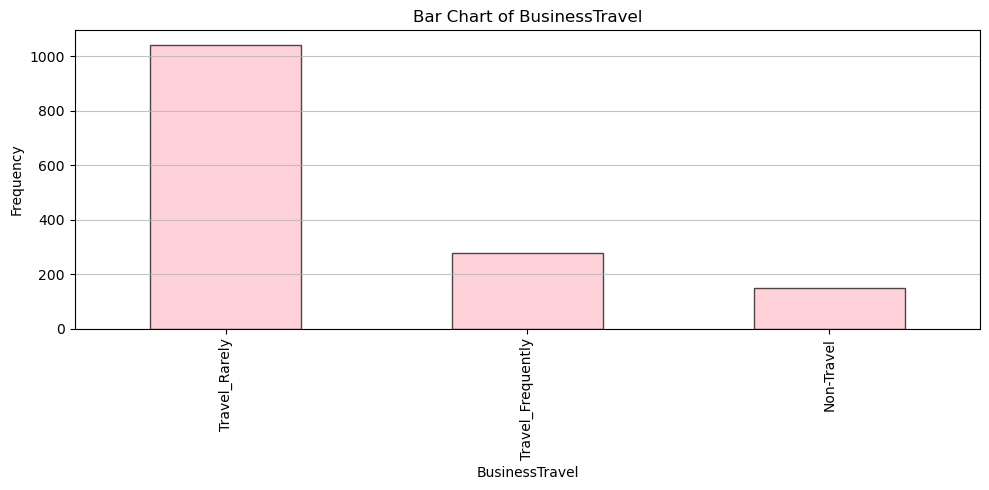

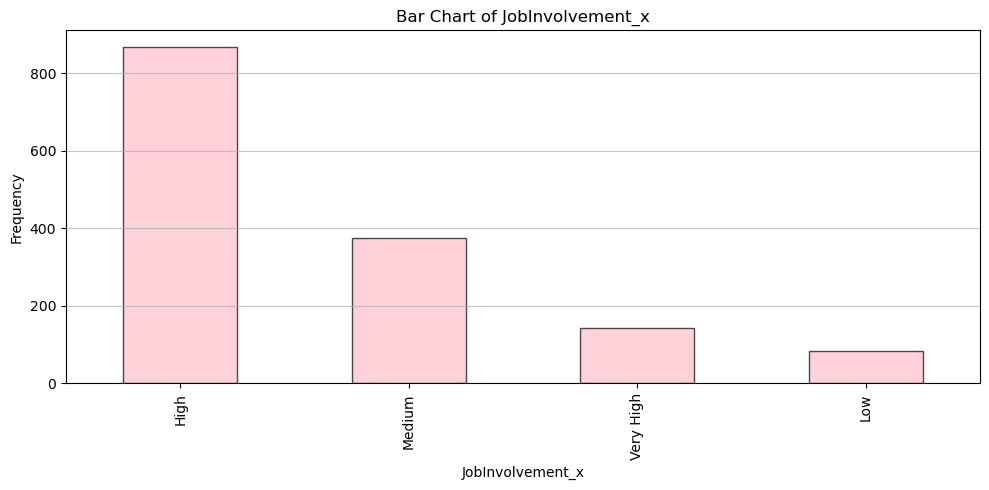

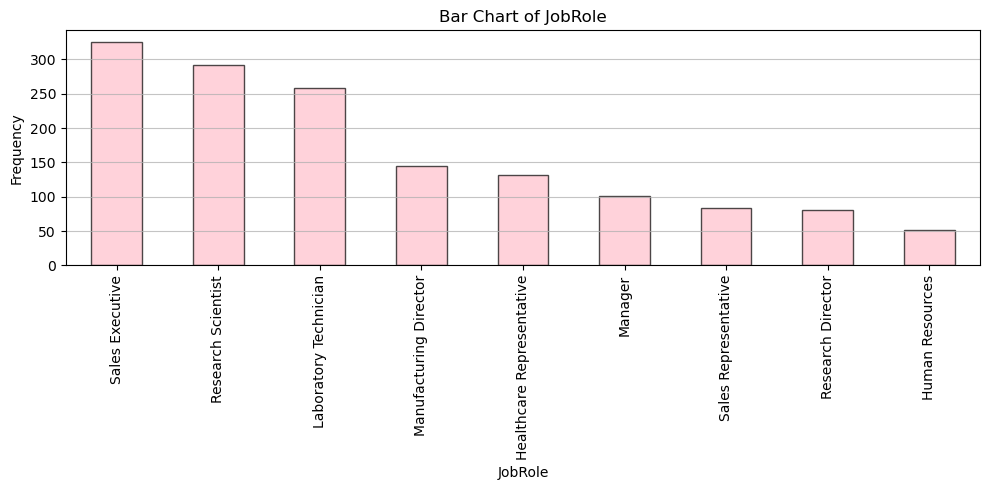

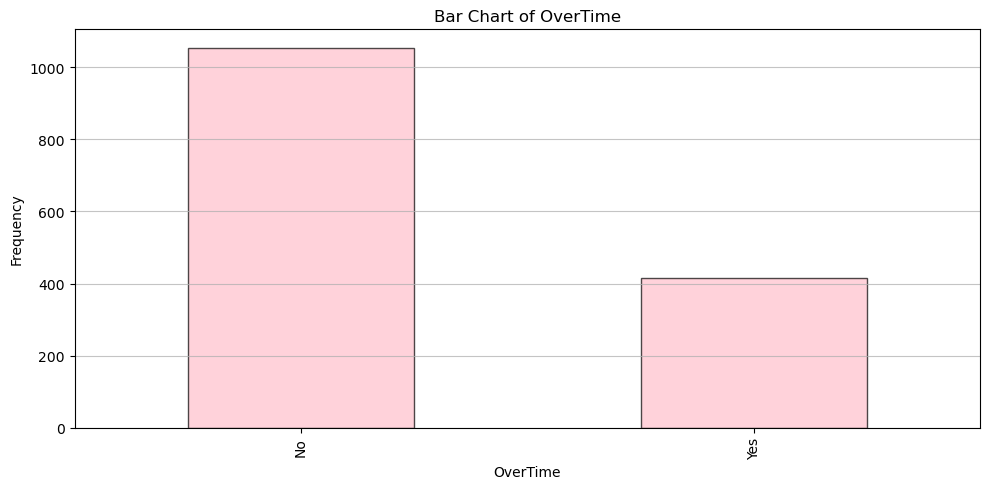

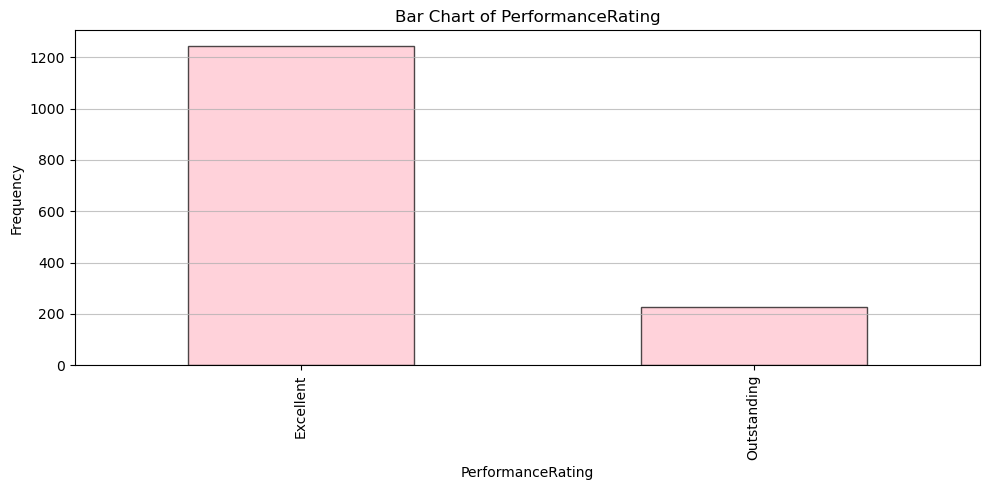

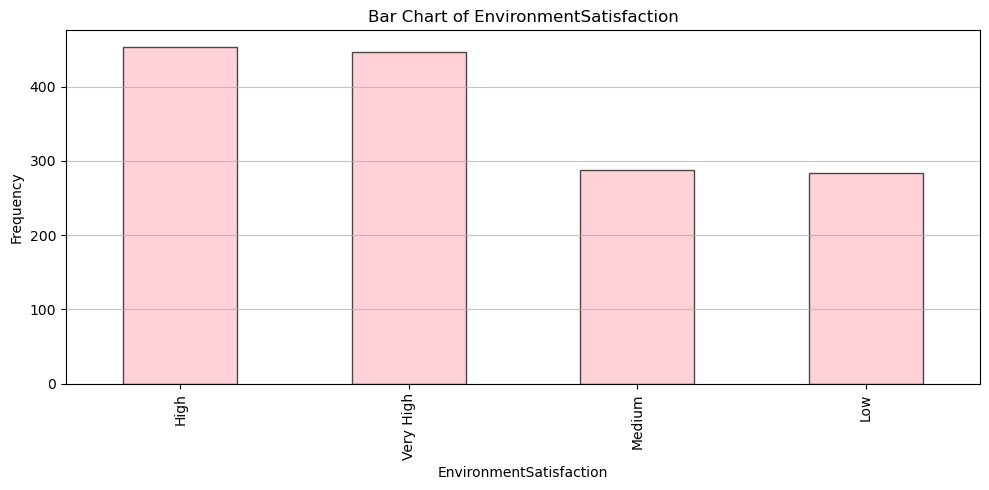

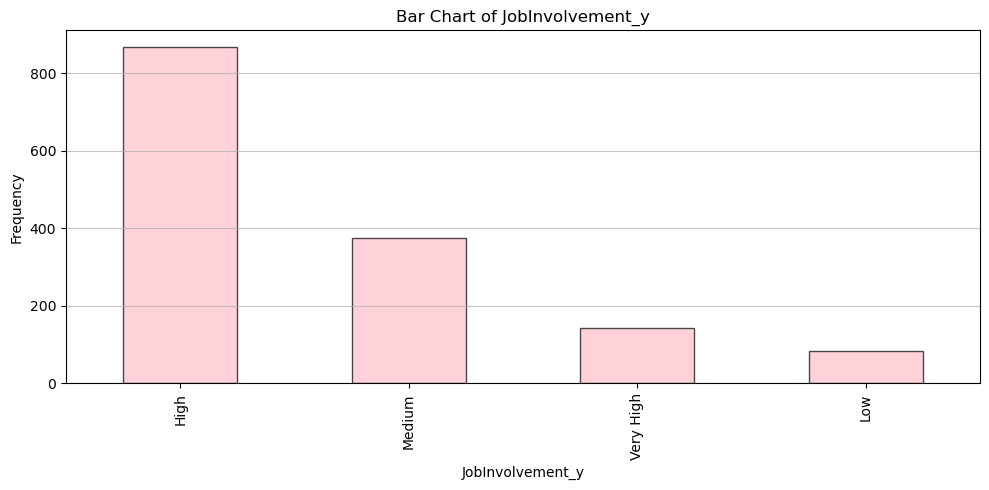

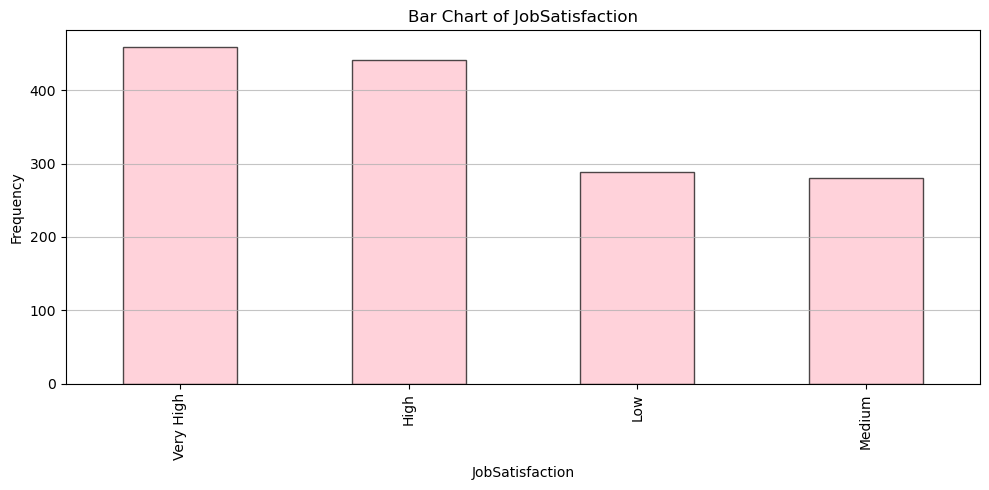

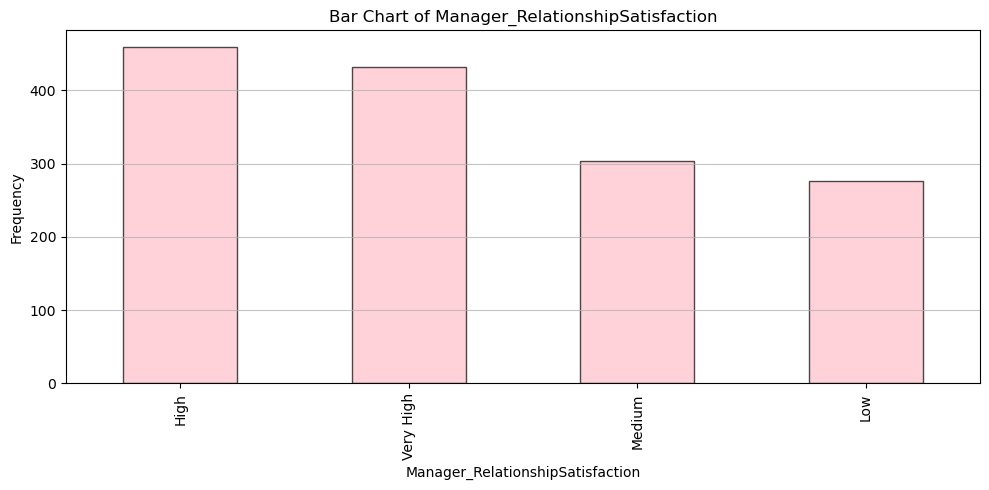

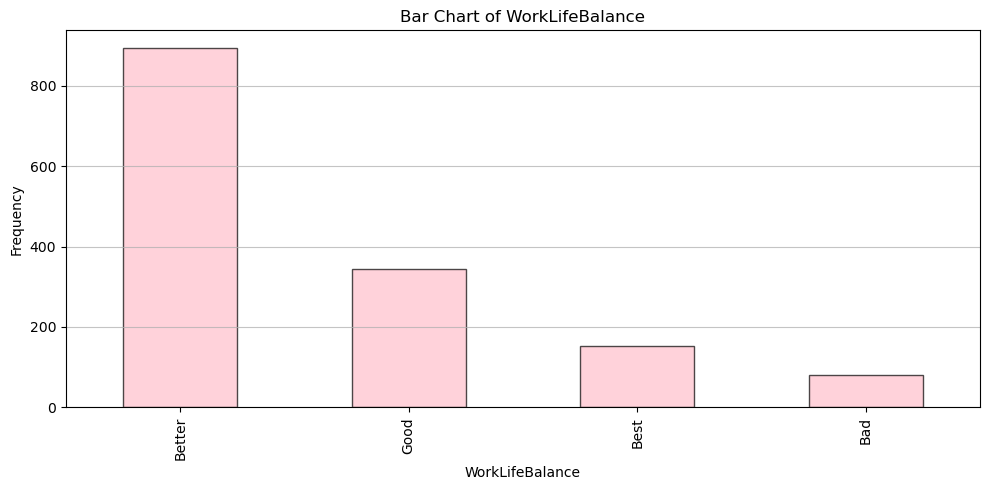

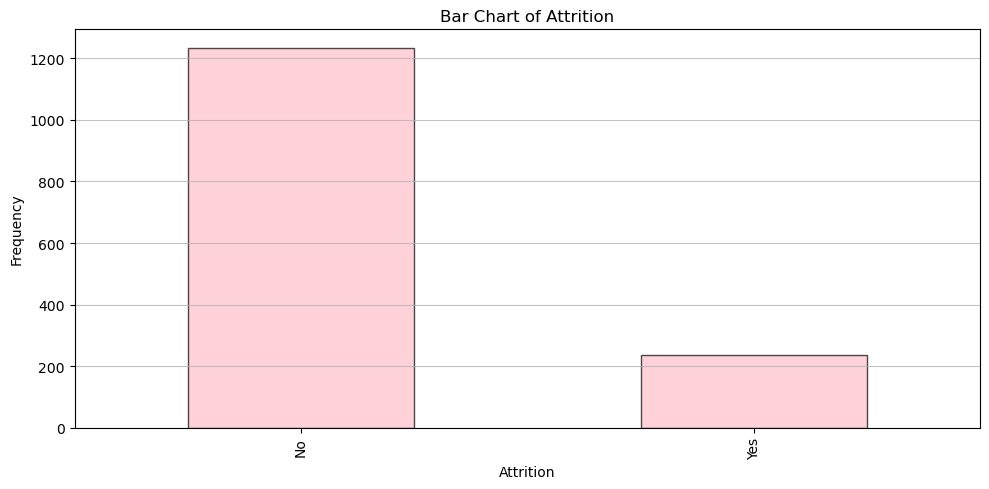

In [17]:
def plot_bar_charts(df):
    if df.empty:
        print("The DataFrame is empty. No plots to display.")
        return
    
    categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
    
    if not categorical_columns:
        print("There are no categorical columns in the DataFrame.")
        return
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        df[col].value_counts().plot(kind='bar', color='pink', edgecolor='k', alpha=0.7)
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()

# Example usage with a DataFrame named final_data
plot_bar_charts(final_data)

In [18]:
final_data.head()

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,6,4,0,5,Medium,High,Very High,Low,Bad,Yes
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,10,7,1,7,High,Medium,Medium,Very High,Better,No
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,0,Very High,Medium,High,Medium,Better,Yes
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,8,7,3,0,Very High,High,High,High,Better,No
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,2,2,2,2,Low,High,Medium,Very High,Better,No


### Q. Perform Data Cleaning Steps on final_data

### a. Impute missing values

In [19]:
# Impute numerical columns with median
numerical_columns = final_data.select_dtypes(include=[np.number]).columns
final_data[numerical_columns] = final_data[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# Impute categorical columns with mode
categorical_columns = final_data.select_dtypes(include=[object]).columns
final_data[categorical_columns] = final_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)


#### b. Outlier treatment 

In [20]:
# Function to treat outliers using IQR method
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lc = Q1 - 1.5 * IQR
    uc = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lc, lc, df[column])
    df[column] = np.where(df[column] > uc, uc, df[column])
    return df

# Applying the outlier treatment to all numerical columns
for column in numerical_columns:
    final_data = treat_outliers(final_data, column)

# Display the DataFrame after outlier treatment
print(final_data)

      EmployeeNumber   Age      Education EducationField  Gender  \
0                1.0  41.0        College  Life Sciences  Female   
1                2.0  49.0  Below College  Life Sciences    Male   
2                4.0  37.0        College          Other    Male   
3                5.0  33.0         Master  Life Sciences  Female   
4                7.0  27.0  Below College        Medical    Male   
...              ...   ...            ...            ...     ...   
1465          2061.0  36.0        College        Medical    Male   
1466          2062.0  39.0  Below College        Medical    Male   
1467          2064.0  27.0       Bachelor  Life Sciences    Male   
1468          2065.0  49.0       Bachelor        Medical    Male   
1469          2068.0  34.0       Bachelor        Medical    Male   

     MaritalStatus Over18              Department     BusinessTravel  \
0           Single      Y                   Sales      Travel_Rarely   
1          Married      Y  Research & D

#### c. Encoding Variables (convert categorical into numerical variables)

In [21]:
final_data_encoded = pd.get_dummies(final_data, columns=categorical_columns, drop_first=True)
final_data_encoded

,EmployeeNumber,Age,DistanceFromHome,JobLevel,MonthlySalary,NumCompaniesWorked,PercentSalaryHike_last_year,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,...,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,Manager_RelationshipSatisfaction_Low,Manager_RelationshipSatisfaction_Medium,Manager_RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Attrition_Yes
0,1.0,41.0,1.0,2.0,5993.0,8.0,11.0,0.0,0.5,6.0,...,False,False,True,True,False,False,False,False,False,True
1,2.0,49.0,8.0,2.0,5130.0,1.0,23.0,1.0,3.0,10.0,...,False,True,False,False,False,True,False,True,False,False
2,4.0,37.0,2.0,1.0,2090.0,6.0,15.0,0.0,3.0,0.0,...,False,False,False,False,True,False,False,True,False,True
3,5.0,33.0,3.0,1.0,2909.0,1.0,11.0,0.0,3.0,8.0,...,False,False,False,False,False,False,False,True,False,False
4,7.0,27.0,2.0,1.0,3468.0,8.5,12.0,1.0,3.0,2.0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061.0,36.0,23.0,2.0,2571.0,4.0,17.0,1.0,3.0,5.0,...,False,False,True,False,False,False,False,True,False,False
1466,2062.0,39.0,6.0,3.0,9991.0,4.0,15.0,1.0,4.5,7.0,...,True,False,False,True,False,False,False,True,False,False
1467,2064.0,27.0,4.0,2.0,6142.0,1.0,20.0,1.0,0.5,6.0,...,False,True,False,False,True,False,False,True,False,False
1468,2065.0,49.0,2.0,2.0,5390.0,2.0,14.0,0.0,3.0,9.0,...,False,True,False,False,False,True,False,False,True,False


#### a. Identify the Key demographic factors influencing attrition behavior

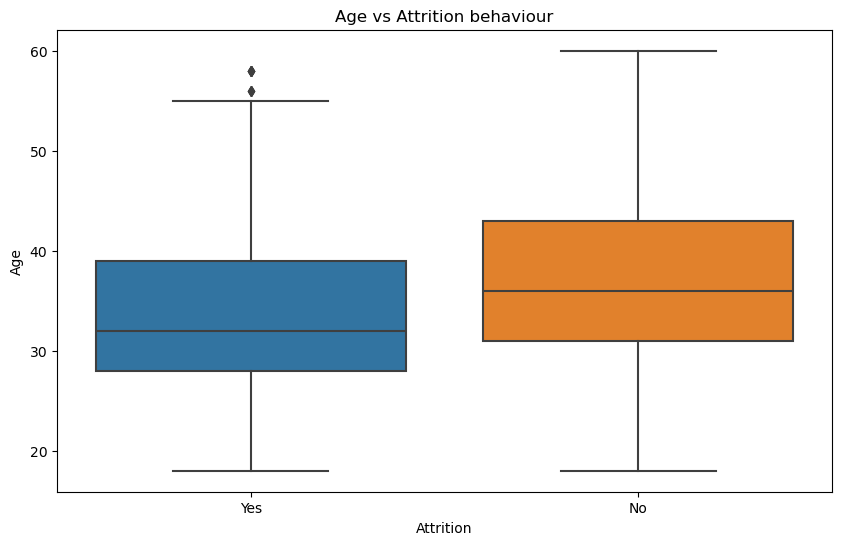

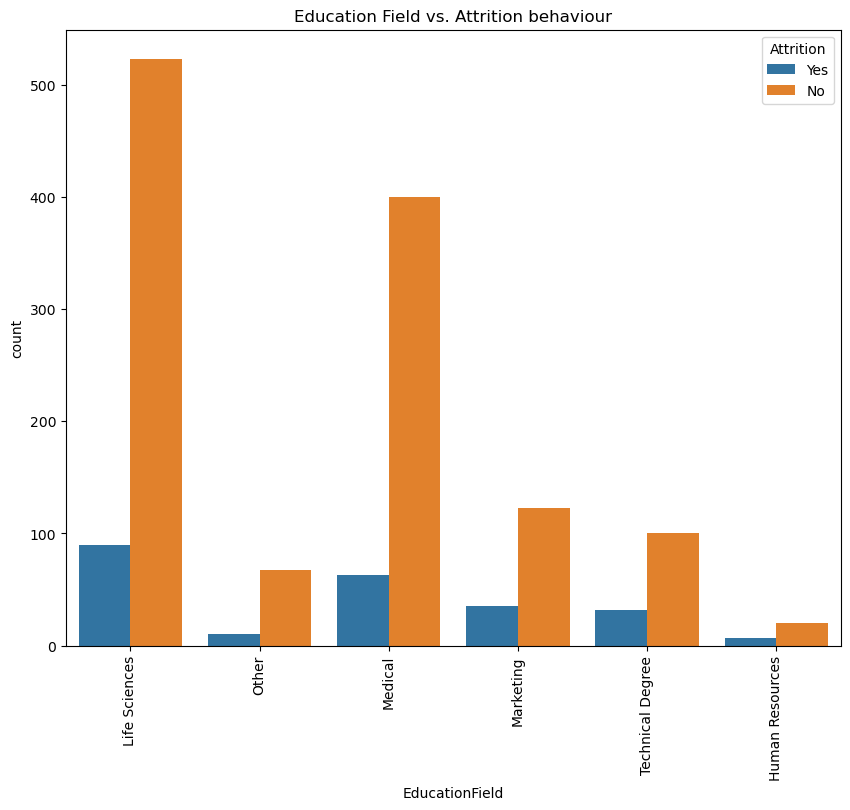

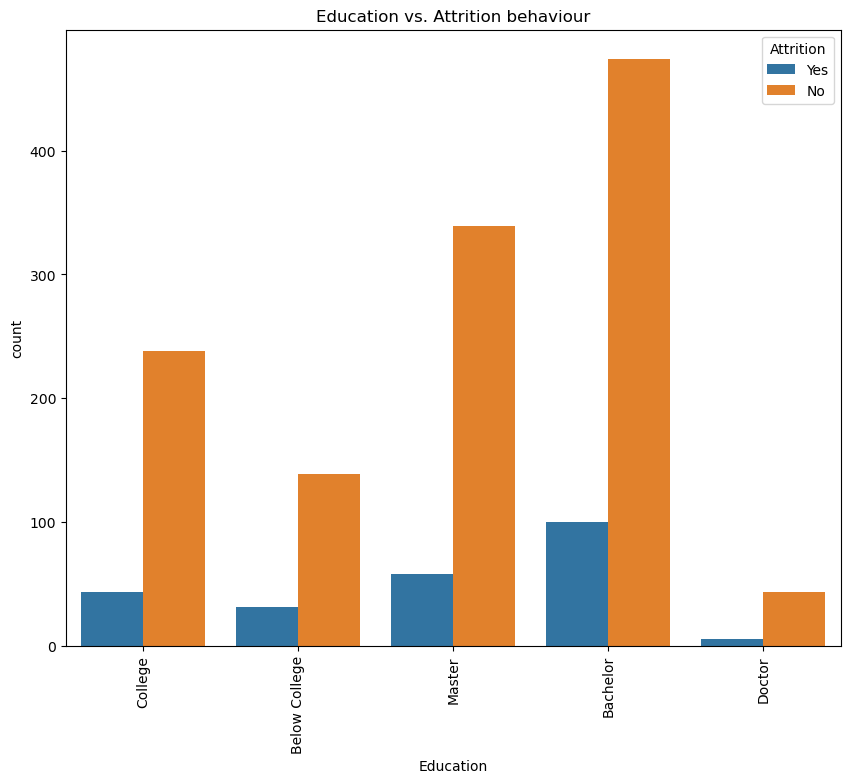

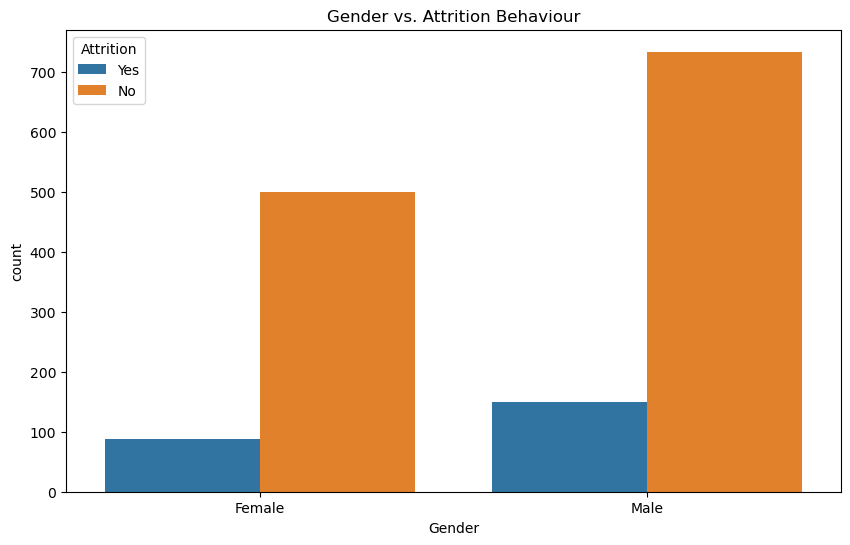

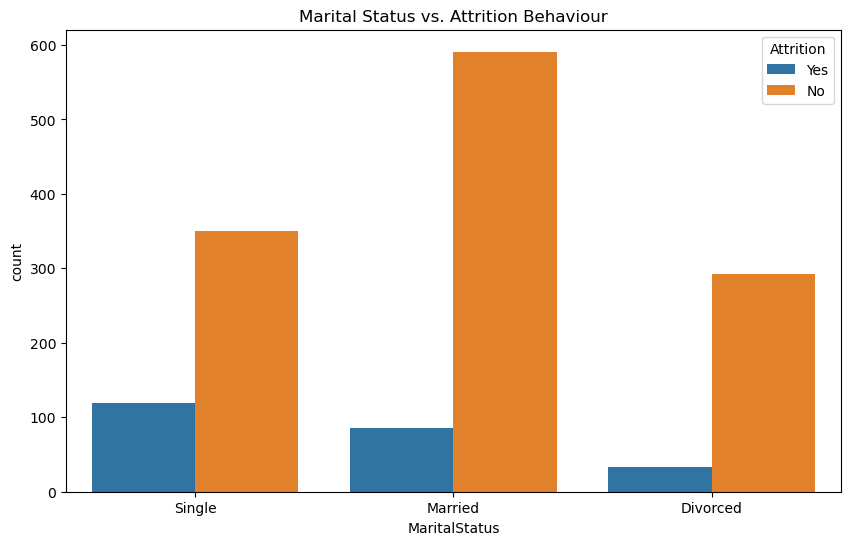

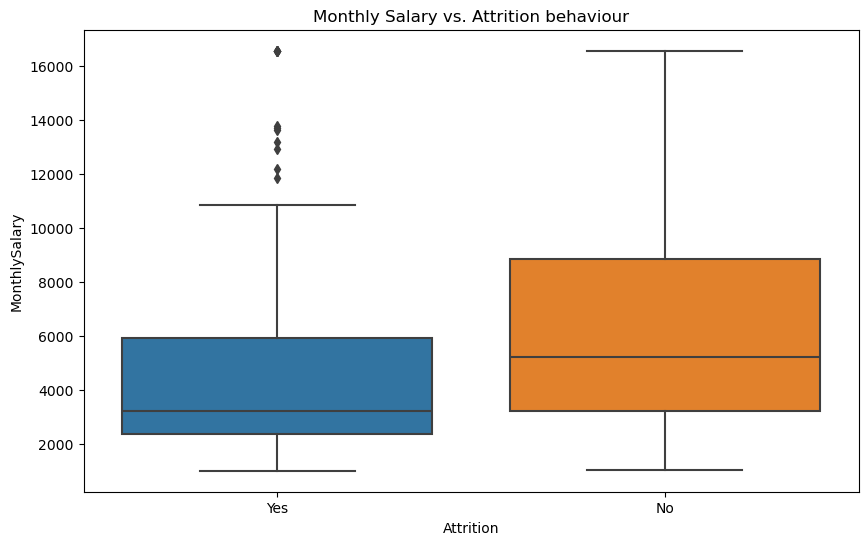

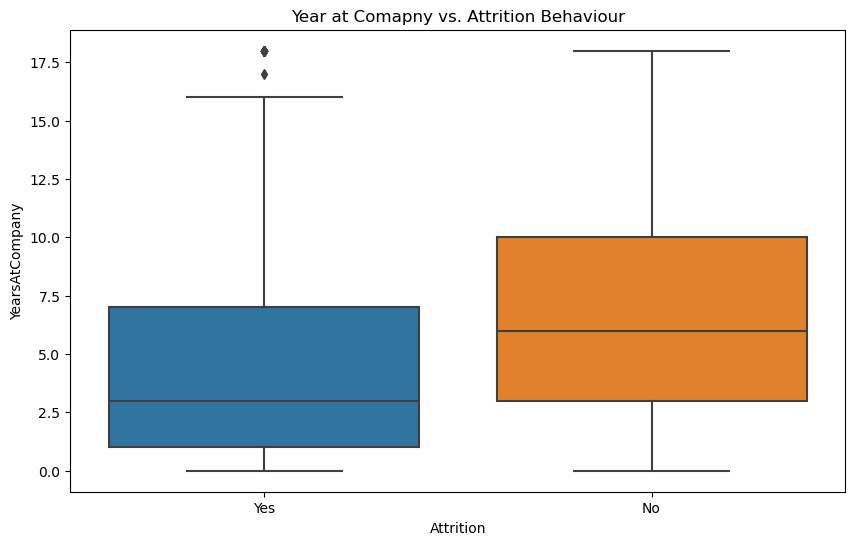

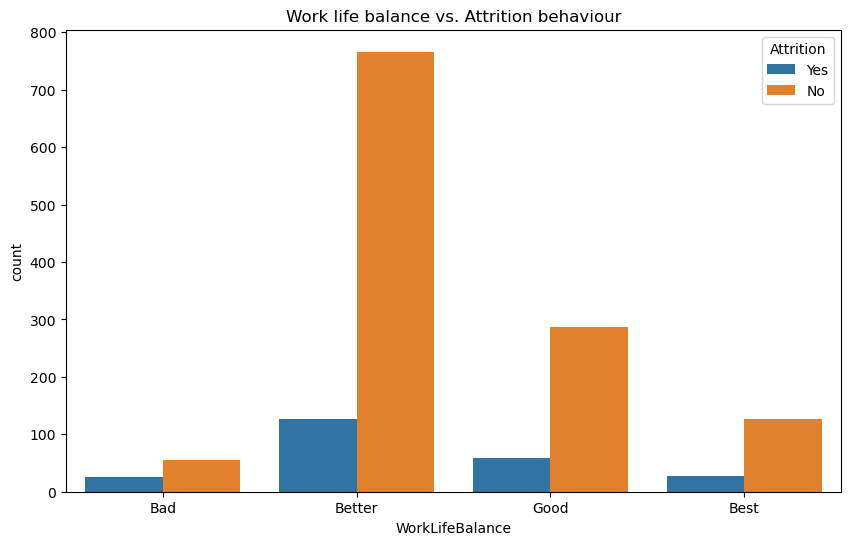

In [22]:
# Analysing the key demographic factors influencing attrition behavior of customer using visualization:

# Age vs Attrition behaviour of Employee:
plt.figure(figsize = (10,6))
sns.boxplot(data = final_data , x = 'Attrition' , y = 'Age')
plt.title("Age vs Attrition behaviour")
plt.show()

# Education Field vs Attrition behaviour of Employee:
plt.figure(figsize = (10,8))
sns.countplot(data = final_data , x = 'EducationField' , hue = 'Attrition')
plt.title("Education Field vs. Attrition behaviour")
plt.xticks(rotation = 90)
plt.show()

# Education vs. Attrition Behaviour of Employees:
plt.figure(figsize = (10,8))
sns.countplot(data = final_data , x = 'Education' , hue = 'Attrition')
plt.title("Education vs. Attrition behaviour")
plt.xticks(rotation = 90)
plt.show()

# Gender vs. Attrition behaviour of Employees"
plt.figure(figsize = (10,6))
sns.countplot(data = final_data , x = 'Gender' , hue = 'Attrition')
plt.title("Gender vs. Attrition Behaviour")
plt.show()

# Marital status vs. Attrition behaviour of Employees:
plt.figure(figsize = (10,6))
sns.countplot(data = final_data, x = 'MaritalStatus' , hue = 'Attrition')
plt.title("Marital Status vs. Attrition Behaviour")
plt.show()

# Monthly salary vs. Attrition Behaviour of Employees:
plt.figure(figsize =(10,6))
sns.boxplot(data = final_data, x = 'Attrition' , y = 'MonthlySalary')
plt.title("Monthly Salary vs. Attrition behaviour")
plt.show()

# Year at company vs. Attrition behaviour of Employees:
plt.figure(figsize = (10,6))
sns.boxplot(data = final_data , x = 'Attrition' , y = 'YearsAtCompany')
plt.title("Year at Comapny vs. Attrition Behaviour")
plt.show()

# Work life balance vs. Attrition behaviour of Employees:
plt.figure(figsize = (10,6))
sns.countplot(data = final_data , x = 'WorkLifeBalance' , hue = 'Attrition')
plt.title("Work life balance vs. Attrition behaviour")
plt.show()

## Insights & Analysis

#### From the visualizations, we can derive which demographics factors are influencing attrition behaviour:

## Different demographic and employment factors can influence attrition trends in various ways. Age plays a crucial role, as younger and older employees may exhibit distinct patterns of leaving the company. Education level and field of study can also impact attrition rates, with specific educational backgrounds potentially correlating with higher or lower turnover. Gender differences might reveal variations in attrition patterns, with male and female employees experiencing different motivations and challenges. Marital status could influence an employee’s decision to stay or leave, as family responsibilities and work-life balance considerations come into play. Additionally, income levels can affect attrition trends, with employees at different income brackets showing varying levels of job satisfaction and stability. The length of time employees have been with the company can impact their likelihood of leaving, with longer tenure possibly leading to greater loyalty. Finally, work-life balance significantly affects attrition behavior, as employees dissatisfied with their work-life balance might be more prone to leaving in search of better conditions.

## b. How employee satisfaction variables influencing attrition

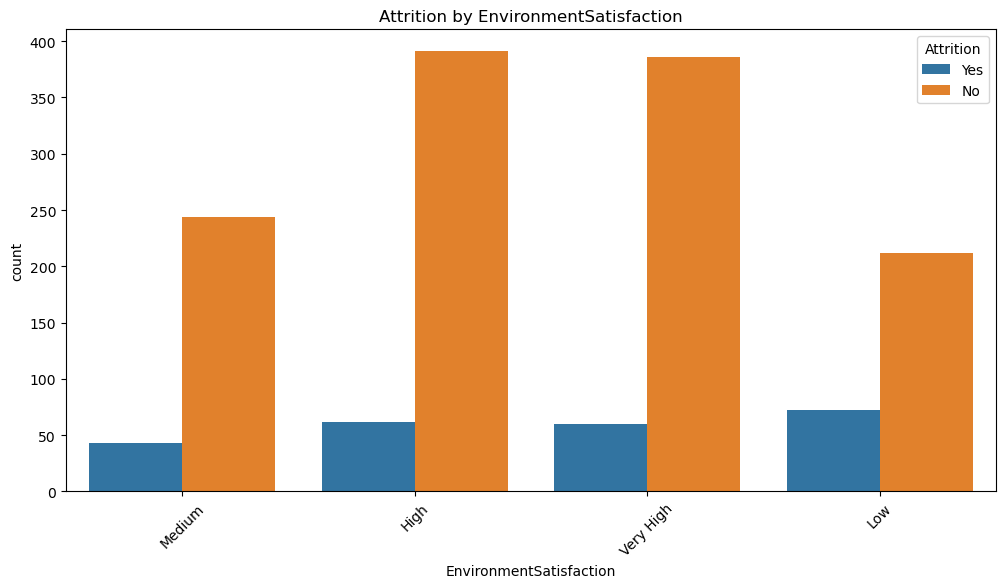

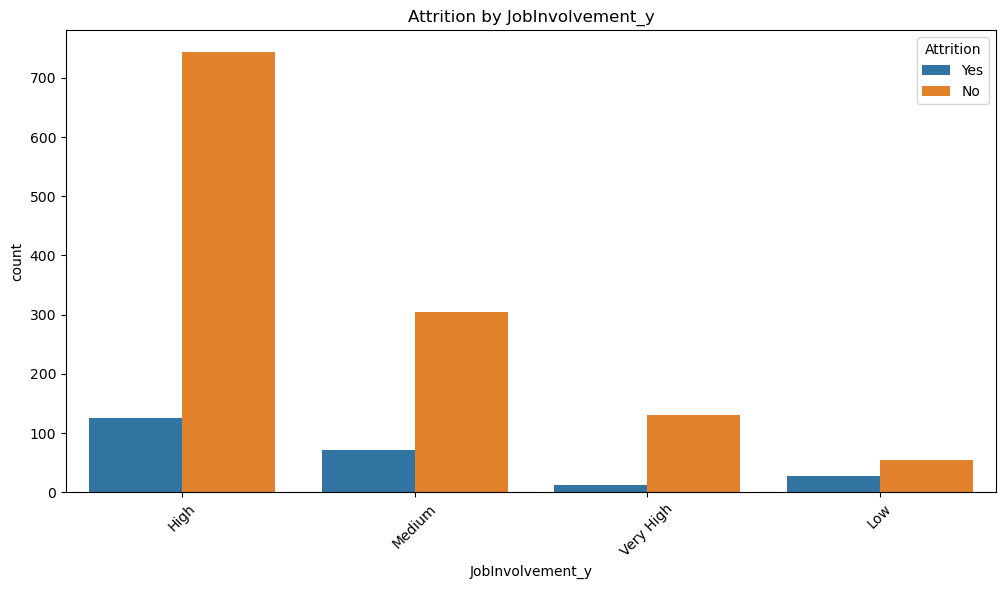

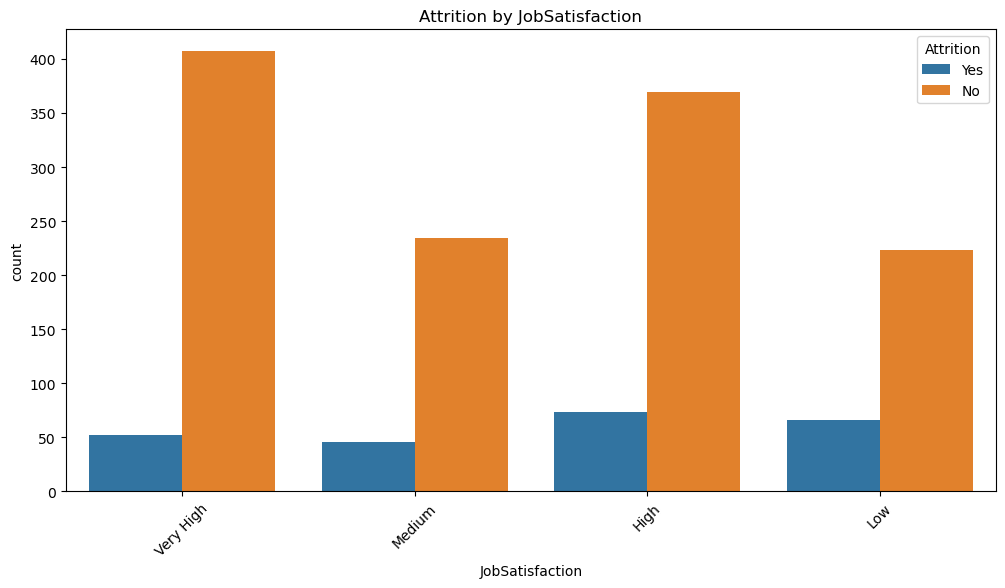

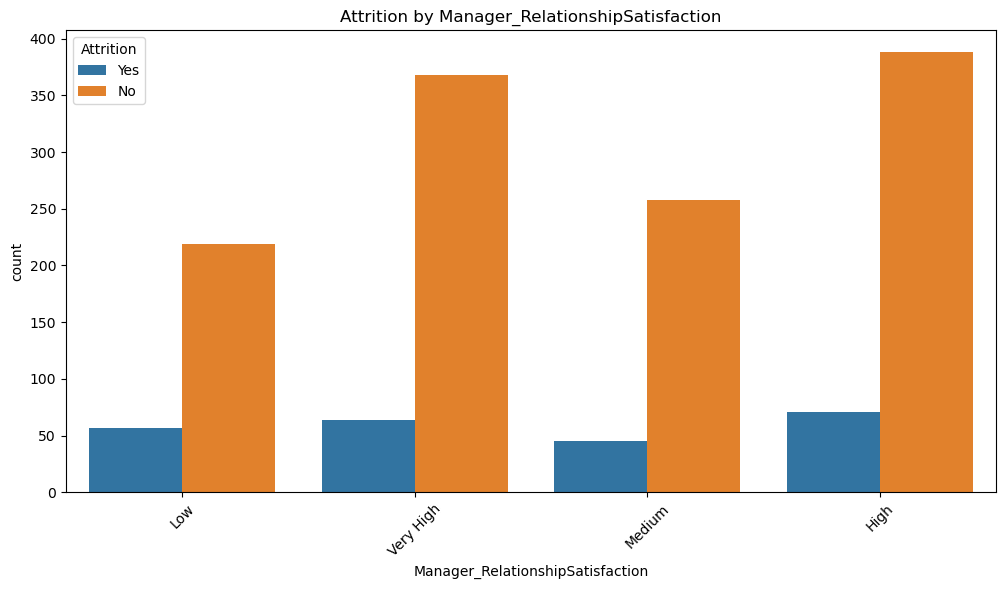

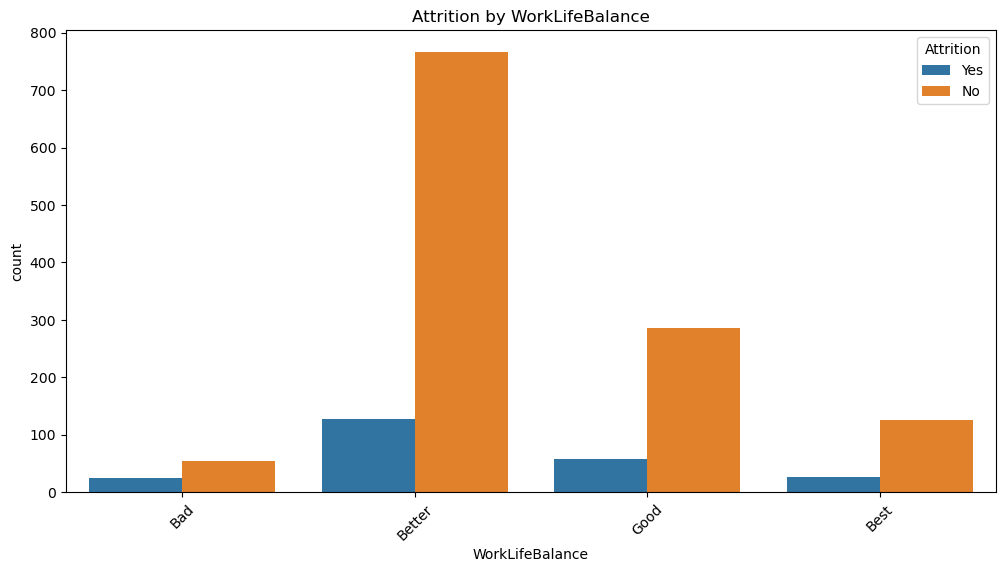

In [23]:
# Create a udf to plot bar chart to analyze the satisfaction categorical variable:

def plot_satisfaction_bar(attrition_col, satisfaction_col):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=final_data, x=satisfaction_col, hue=attrition_col)
    plt.title(f'Attrition by {satisfaction_col}')
    plt.xticks(rotation=45)
    plt.show()

# Plotting attrition by Environment Satisfaction
plot_satisfaction_bar('Attrition', 'EnvironmentSatisfaction')

# Plotting attrition by Job Involvement
plot_satisfaction_bar('Attrition', 'JobInvolvement_y')

# Plotting attrition by Job Satisfaction
plot_satisfaction_bar('Attrition', 'JobSatisfaction')

# Plotting attrition by Manager Relationship Satisfaction
plot_satisfaction_bar('Attrition', 'Manager_RelationshipSatisfaction')

# Plotting attrition by Work Life Balance
plot_satisfaction_bar('Attrition', 'WorkLifeBalance')
    
    

## Insights:

## These charts illustrate the frequency distribution of satisfaction levels among employees who left the company compared to those who stayed. They provide a visual representation of how different levels of satisfaction are associated with attrition, highlighting any significant differences in satisfaction between employees who departed and those who remained.

## c. How employee job related variables influencing attrition

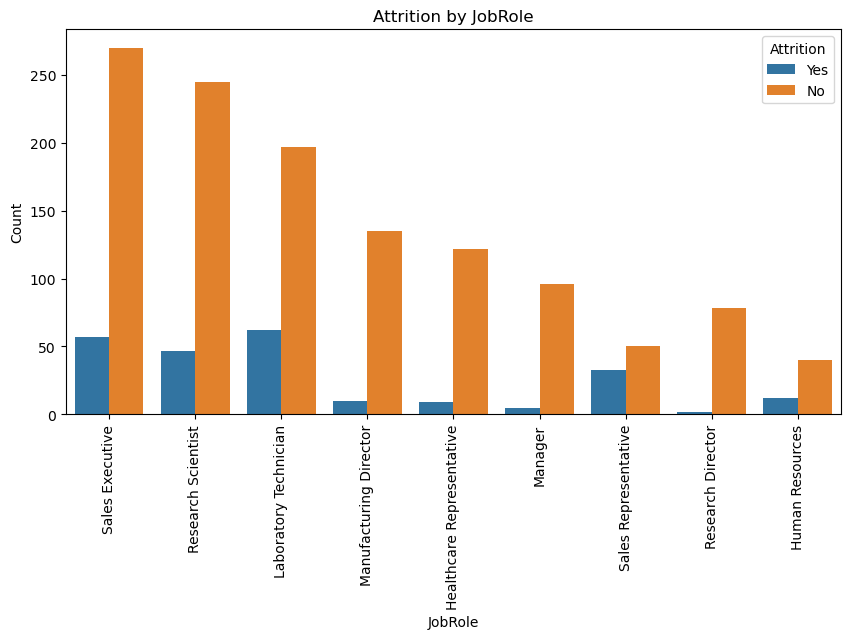

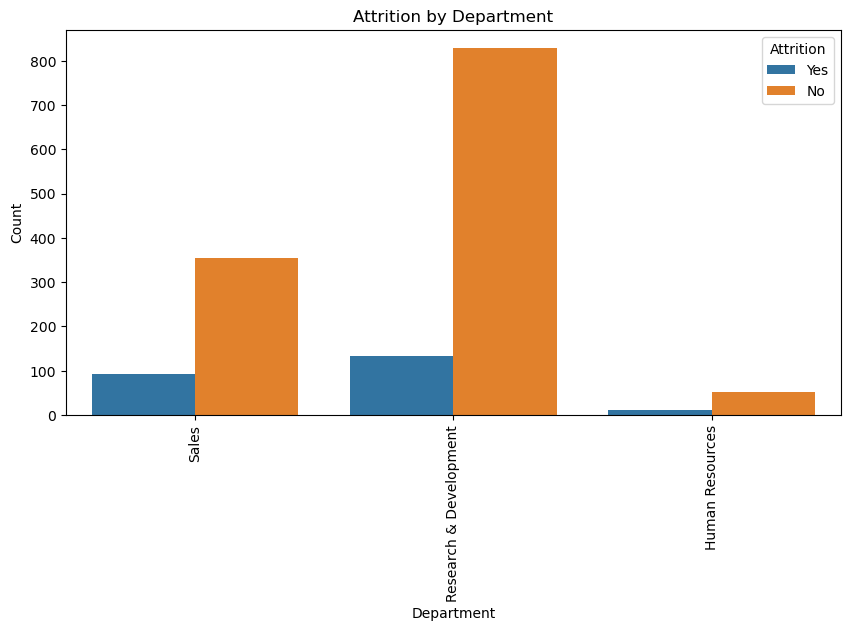

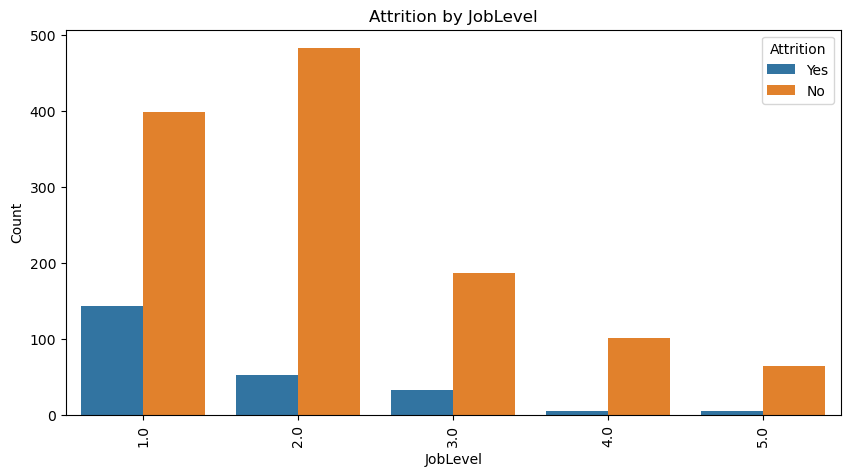

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


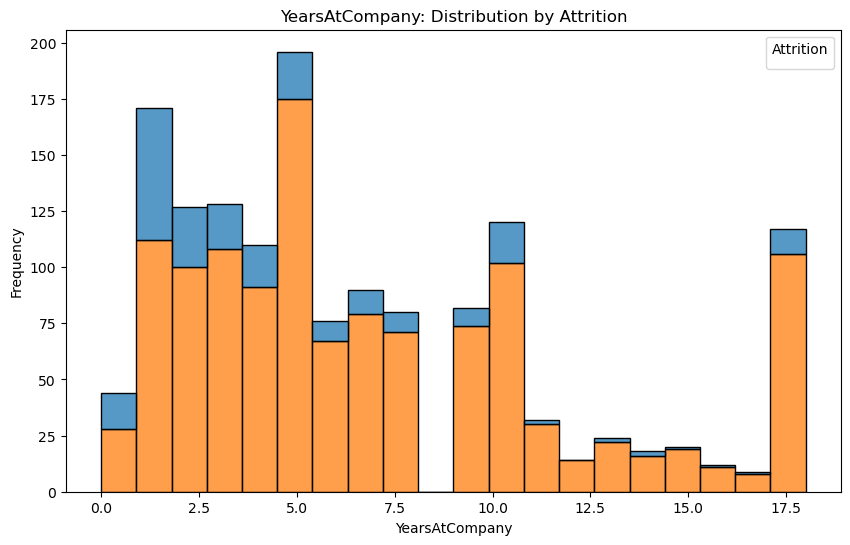

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


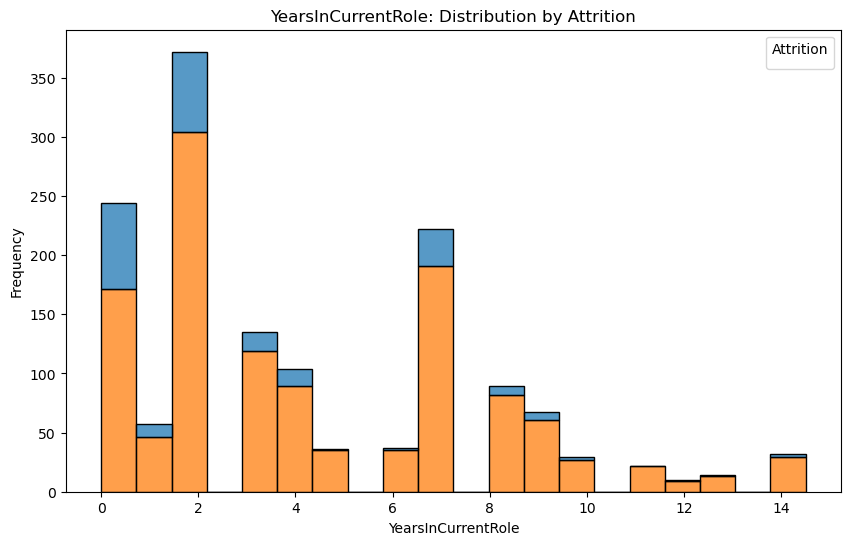

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


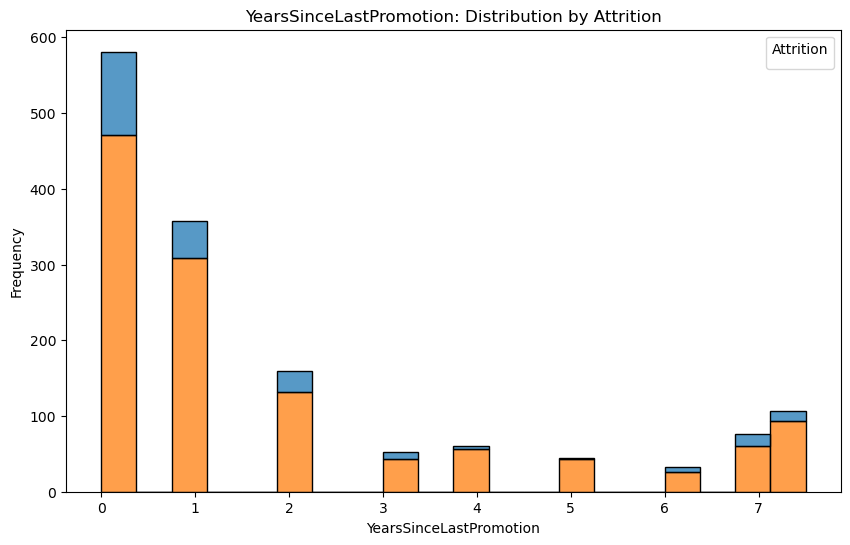

C:\Users\kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


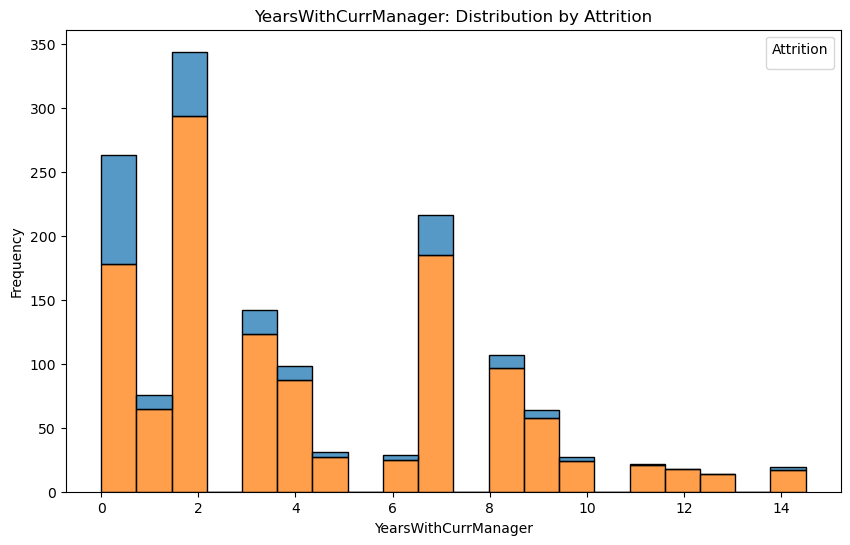

In [24]:
# Create a function to plot bar charts for categorical job-related variables
def plot_job_related(attrition_col, job_col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=final_data, x=job_col, hue=attrition_col)
    plt.title(f'Attrition by {job_col}')
    plt.xticks(rotation=90)
    plt.xlabel(job_col)
    plt.ylabel('Count')
    plt.legend(title='Attrition')
    plt.show()

# Create a function to plot histogram plots for numerical job-related variables
def plot_histogram(attrition_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=final_data, x=num_col, hue=attrition_col, multiple='stack', bins=20)
    plt.title(f'{num_col}: Distribution by Attrition')
    plt.xlabel(num_col)
    plt.ylabel('Frequency')
    plt.legend(title='Attrition')
    plt.show()
    
# Plotting attrition by job role
plot_job_related('Attrition', 'JobRole')

# Plotting attrition by department
plot_job_related('Attrition', 'Department')

# Plotting attrition by job level
plot_job_related('Attrition', 'JobLevel')

# Plotting attrition by total working years
plot_histogram('Attrition', 'YearsAtCompany')

# Plotting attrition by years at current role
plot_histogram('Attrition', 'YearsInCurrentRole')

# Plotting attrition by years since last promotion
plot_histogram('Attrition', 'YearsSinceLastPromotion')

# Plotting attrition by years with current manager
plot_histogram('Attrition', 'YearsWithCurrManager')

## Insights :

 ## The bar chart of job roles will reveal whether certain roles have higher attrition rates compared to others. Similarly, the bar chart of departments will indicate if specific departments experience higher attrition rates. The bar chart for job levels will show if attrition is more prevalent in particular job levels.

     The histograms will display the distribution of working years at the company among employees who stayed versus those who left, highlighting whether employees with shorter or longer tenures have different attrition patterns. Additionally, the histogram will demonstrate how tenure in the current role influences attrition. Finally, another histogram will illustrate the impact of the time since the last promotion on attrition rates.

## Q. Create & Perform different data analysis (summaries by performing aggregations based on your understanding of data - at least 10 analysis) Note: You may perform different univariate, bivariate and multivariate analysis for this taskNote: Need to write detailed insights from the analysis

In [25]:
# Calculate the average age by gender
Avg_age_by_gender = final_data.groupby('Gender')['Age'].mean().reset_index()

# Print the result
print("Average Age by Gender:")
print(Avg_age_by_gender)

# Print the insight
print("\nInsight: This table displays the average age of employees categorized by gender. It helps to understand if there is a significant age difference between male and female employees and whether this might influence their attrition behavior.")

Average Age by Gender:
   Gender        Age
0  Female  37.311755
1    Male  36.639864

Insight: This table displays the average age of employees categorized by gender. It helps to understand if there is a significant age difference between male and female employees and whether this might influence their attrition behavior.


In [36]:
# 2 Calculate the total monthly income by department
Monthly_income_by_department = final_data.groupby('Department')['MonthlySalary'].sum().reset_index()

# Print the result
print("Total Monthly Income by Department:")
print(Monthly_income_by_department)

# Print the insight
print("\nInsight: This table shows the total monthly income of employees grouped by department. It helps identify which department contributes the most to the company's overall payroll, which can be useful for budget allocation and financial planning.")

Total Monthly Income by Department:
               Department  MonthlySalary
0         Human Resources     399738.375
1  Research & Development    5896249.375
2                   Sales    3063809.375

Insight: This table shows the total monthly income of employees grouped by department. It helps identify which department contributes the most to the company's overall payroll, which can be useful for budget allocation and financial planning.


In [27]:
# 3. Total Monthly Income by Gender:

# Calculate the total monthly income by gender
Monthly_income_by_gender = final_data.groupby('Gender')['MonthlySalary'].sum().reset_index()

# Print the result
print("Total Monthly Income by Gender:")
print(Monthly_income_by_gender)

# Print the insight
print("\nInsight: This table displays the total monthly income of employees categorized by gender. It helps identify which gender contributes more to the company's payroll, providing insight into potential salary distribution disparities between male and female employees.")

Total Monthly Income by Gender:
   Gender  MonthlySalary
0  Female    3863729.500
1    Male    5496067.625

Insight: This table displays the total monthly income of employees categorized by gender. It helps identify which gender contributes more to the company's payroll, providing insight into potential salary distribution disparities between male and female employees.


In [28]:
#### 4. Distribution of Distance from home by Attrition:

# Calculate the average distance from home by attrition status
Distribution_distance_by_Attrition = final_data.groupby('Attrition')['DistanceFromHome'].mean().reset_index()

# Print the result
print("Average Distance from Home by Attrition Status:")
print(Distribution_distance_by_Attrition)

# Print the insight
print("\nInsight: This table shows the average distance from home for employees who stayed versus those who left the company. It helps determine whether distance from the workplace influences attrition rates, providing insights into potential relocation or commuting challenges faced by employees.")

Average Distance from Home by Attrition Status:
  Attrition  DistanceFromHome
0        No          8.920519
1       Yes         10.670886

Insight: This table shows the average distance from home for employees who stayed versus those who left the company. It helps determine whether distance from the workplace influences attrition rates, providing insights into potential relocation or commuting challenges faced by employees.


In [29]:
### 5. Number of people from job satisfaction by age group:

# Create age groups
final_data['Age_group'] = pd.cut(final_data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Calculate job satisfaction counts by age group
Age_group_by_satisfaction = final_data.groupby('Age_group')['JobSatisfaction'].value_counts().unstack().fillna(0)

# Print the result
print("Job Satisfaction by Age Group:")
print(Age_group_by_satisfaction)

# Print the insight
print("\nInsight: This table shows the distribution of job satisfaction levels across different age groups. Analyzing this data helps in understanding how job satisfaction varies with age, which can inform tailored HR policies and interventions to improve employee satisfaction and retention.")

Job Satisfaction by Age Group:
JobSatisfaction  High  Low  Medium  Very High
Age_group                                    
20-30             107   77      64        110
30-40             183  113     123        202
40-50             101   67      61         92
50-60              42   27      27         46

Insight: This table shows the distribution of job satisfaction levels across different age groups. Analyzing this data helps in understanding how job satisfaction varies with age, which can inform tailored HR policies and interventions to improve employee satisfaction and retention.


C:\Users\kumar\AppData\Local\Temp\ipykernel_14712\1776323056.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_group_by_satisfaction = final_data.groupby('Age_group')['JobSatisfaction'].value_counts().unstack().fillna(0)


In [30]:
#### 6. Attrition rate by marital status:

# Calculate the count of attrition by marital status
Attrition_rate_by_marital_status = final_data.groupby('MaritalStatus')['Attrition'].value_counts().unstack().fillna(0)

# Print the result
print("Attrition Rate by Marital Status:")
print(Attrition_rate_by_marital_status)

# Print the insight
print("\nInsight: This table displays the count of attrition occurrences for each marital status category. It helps in understanding whether marital status has an impact on employee attrition rates, providing insights into potential factors influencing employees' decisions to stay or leave.")

Attrition Rate by Marital Status:
Attrition       No  Yes
MaritalStatus          
Divorced       292   33
Married        591   85
Single         350  119

Insight: This table displays the count of attrition occurrences for each marital status category. It helps in understanding whether marital status has an impact on employee attrition rates, providing insights into potential factors influencing employees' decisions to stay or leave.


In [31]:
#### 7. Average monthly income by Education level:

# Calculate the average monthly income by education level
Avg_income_education_level = final_data.groupby('Education')['MonthlySalary'].mean().reset_index()

# Print the result
print("Average Monthly Income by Education Level:")
print(Avg_income_education_level)

# Print the insight
print("\nInsight: This table displays the average monthly income for employees categorized by their education level. Analyzing this data can reveal whether higher levels of education are associated with higher salaries, providing insights into the relationship between educational qualifications and income levels.")

Average Monthly Income by Education Level:
       Education  MonthlySalary
0       Bachelor    6376.396559
1  Below College    5535.345588
2        College    6105.703292
3         Doctor    8153.580729
4         Master    6679.250000

Insight: This table displays the average monthly income for employees categorized by their education level. Analyzing this data can reveal whether higher levels of education are associated with higher salaries, providing insights into the relationship between educational qualifications and income levels.


In [32]:
#### 8. Distribution of job involvement by Gender:

# Calculate the count of job involvement levels by gender
Job_involvement_by_gender = final_data.groupby('Gender')['JobInvolvement_y'].value_counts().unstack().fillna(0)

# Print the result
print("Job Involvement Levels by Gender:")
print(Job_involvement_by_gender)

# Print the insight
print("\nInsight: This table displays the distribution of job involvement levels across different genders. Analyzing this data helps to identify if there are any disparities in engagement between male and female employees, providing insights into potential differences in job involvement or motivation.")


Job Involvement Levels by Gender:
JobInvolvement_y  High  Low  Medium  Very High
Gender                                        
Female             344   31     159         53
Male               524   52     216         91

Insight: This table displays the distribution of job involvement levels across different genders. Analyzing this data helps to identify if there are any disparities in engagement between male and female employees, providing insights into potential differences in job involvement or motivation.


In [33]:
#### 9. Distribution of Job role by Department:

# Calculate the count of job roles by department
Job_role_by_department = final_data.groupby('Department')['JobRole'].value_counts().unstack().fillna(0)

# Print the result
print("Job Role Distribution by Department:")
print(Job_role_by_department)

# Print the insight
print("\nInsight: This table shows the distribution of job roles within each department. It helps to identify the number of different job roles across various departments, providing insights into the role distribution and departmental structure within the company.")

Job Role Distribution by Department:
JobRole                 Healthcare Representative  Human Resources  \
Department                                                           
Human Resources                               0.0             52.0   
Research & Development                      131.0              0.0   
Sales                                         0.0              0.0   

JobRole                 Laboratory Technician  Manager  \
Department                                               
Human Resources                           0.0     11.0   
Research & Development                  259.0     53.0   
Sales                                     0.0     37.0   

JobRole                 Manufacturing Director  Research Director  \
Department                                                          
Human Resources                            0.0                0.0   
Research & Development                   145.0               80.0   
Sales                                      0.

In [34]:
#### 10. Average age by attrition status:

# Calculate the average age by attrition status
Avg_age_by_attrition = final_data.groupby('Attrition')['Age'].mean()

# Print the result
print("Average Age by Attrition Status:")
print(Avg_age_by_attrition)

# Print the insight
print("\nInsight: This analysis shows the average age of employees who stayed versus those who left the company. It helps to identify if there is a significant age difference between the two groups, providing insights into whether age might influence attrition rates.")

Average Age by Attrition Status:
Attrition
No     37.542579
Yes    33.607595
Name: Age, dtype: float64

Insight: This analysis shows the average age of employees who stayed versus those who left the company. It helps to identify if there is a significant age difference between the two groups, providing insights into whether age might influence attrition rates.


## Q. Create data visualizations that suits for the above analysis (based on your understanding of data and visualizations)

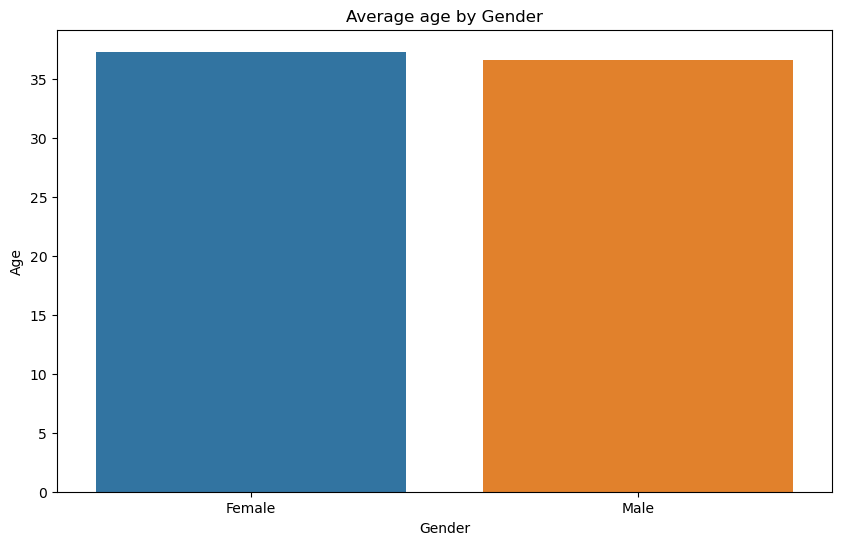

In [35]:
### 1. Average age by gender:

plt.figure(figsize = (10,6))
sns.barplot(data = Avg_age_by_gender , x = 'Gender' , y = 'Age')
plt.title("Average age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

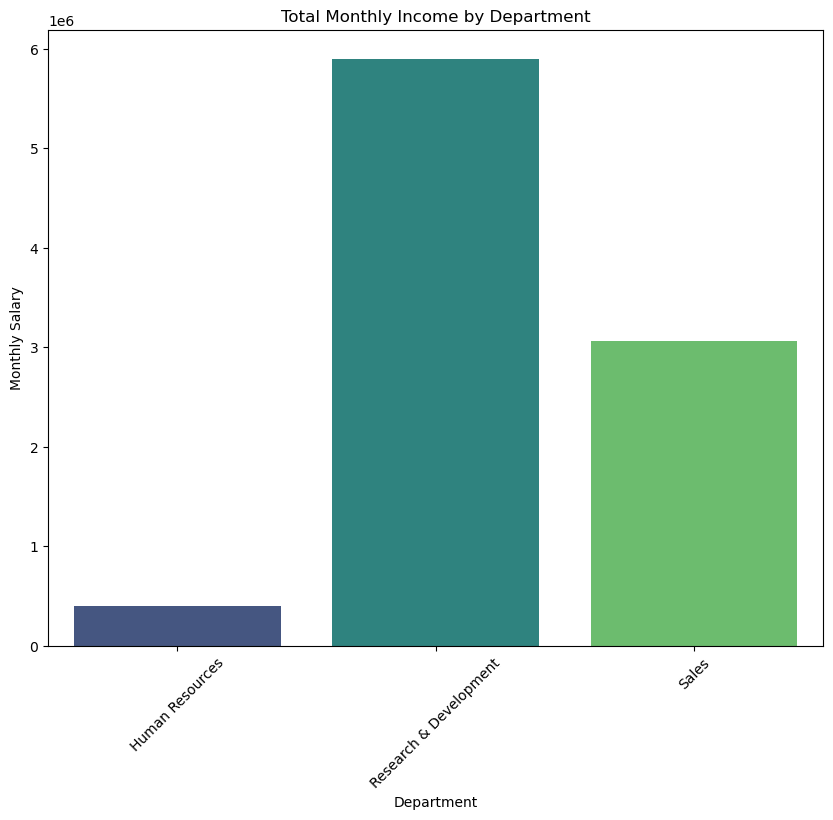

In [37]:
# 2 Calculate the total monthly income by department:

plt.figure(figsize = (10,8))
sns.barplot(x = 'Department' , y = 'MonthlySalary' , data = Monthly_income_by_department , palette= 'viridis' )
plt.title("Total Monthly Income by Department")
plt.xlabel("Department")
plt.ylabel("Monthly Salary")
plt.xticks(rotation = 45)
plt.show()

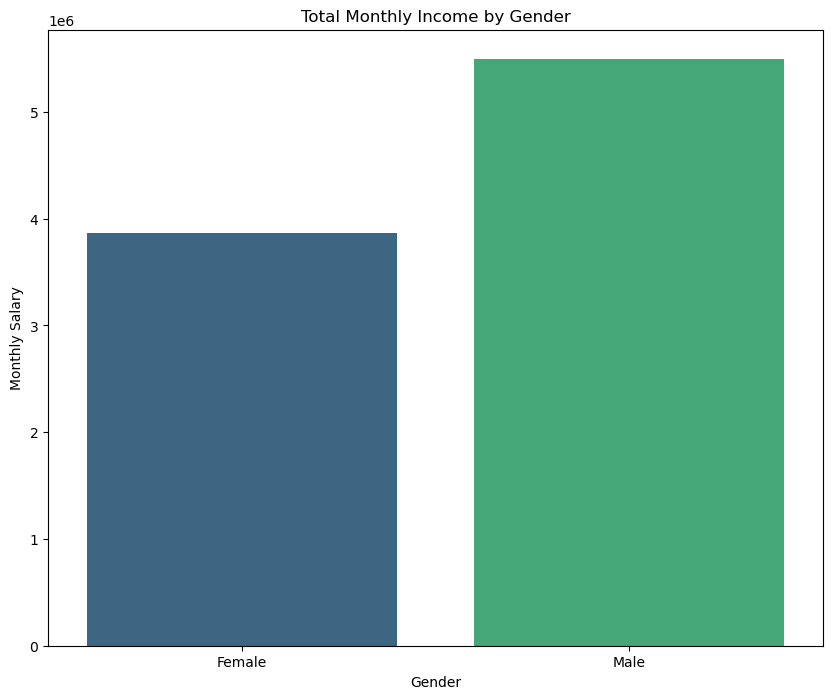

In [38]:
# 3. Total Monthly Income by Gender:

plt.figure(figsize = (10,8))
sns.barplot(x = 'Gender' , y = 'MonthlySalary' , data = Monthly_income_by_gender , palette= 'viridis')
plt.title("Total Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Monthly Salary")
plt.show()

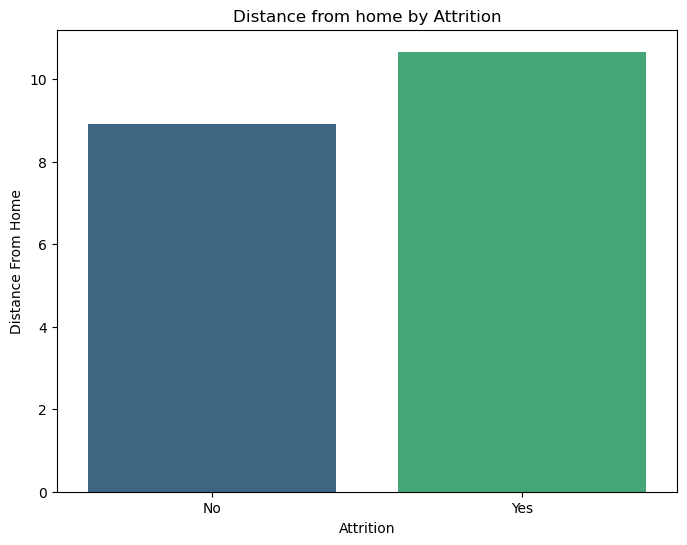

In [40]:
#### 4. Distribution of Distance from home by Attrition:

# Calculate the average distance from home by attrition status
Distribution_distance_by_Attrition = final_data.groupby('Attrition')['DistanceFromHome'].mean().reset_index()

# plot the bar chart:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Attrition' , y = 'DistanceFromHome' , data = Distribution_distance_by_Attrition , palette='viridis')
plt.title("Distance from home by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance From Home")
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_14712\3542547583.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_group_by_satisfaction = final_data.groupby('Age_group')['JobSatisfaction'].value_counts().unstack().fillna(0)


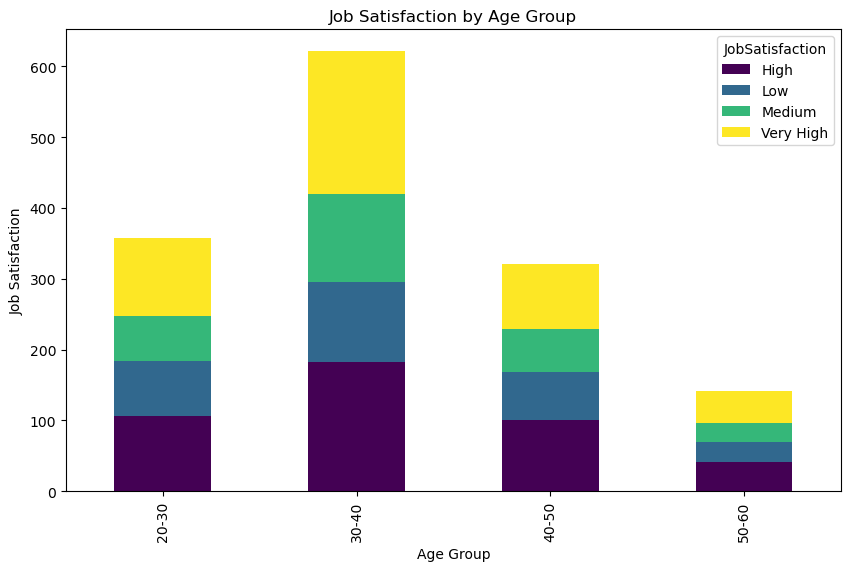

In [42]:
### 5. Number of people from job satisfaction by age group:

# Create age groups
final_data['Age_group'] = pd.cut(final_data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Calculate job satisfaction counts by age group
Age_group_by_satisfaction = final_data.groupby('Age_group')['JobSatisfaction'].value_counts().unstack().fillna(0)

# plot the bar chart 
Age_group_by_satisfaction.plot(kind = 'bar' , stacked = True , figsize = (10,6) , colormap = 'viridis')
plt.title("Job Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Job Satisfaction")
plt.show()

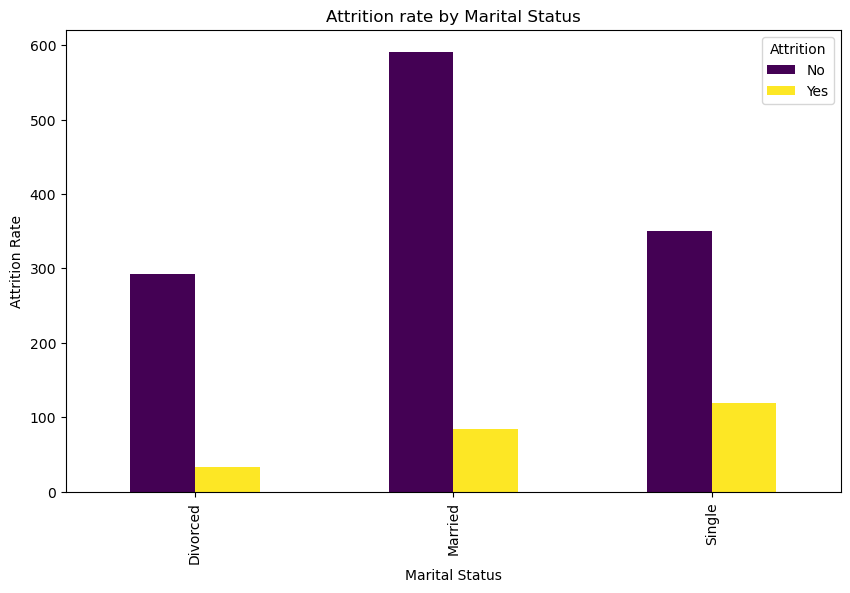

In [43]:
#### 6. Attrition rate by marital status:

# Calculate the count of attrition by marital status
Attrition_rate_by_marital_status = final_data.groupby('MaritalStatus')['Attrition'].value_counts().unstack().fillna(0)

# plot the bar chart:

Attrition_rate_by_marital_status.plot(kind = 'bar' , stacked = False , figsize = (10,6) , colormap = 'viridis')
plt.title("Attrition rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Attrition Rate")
plt.show()

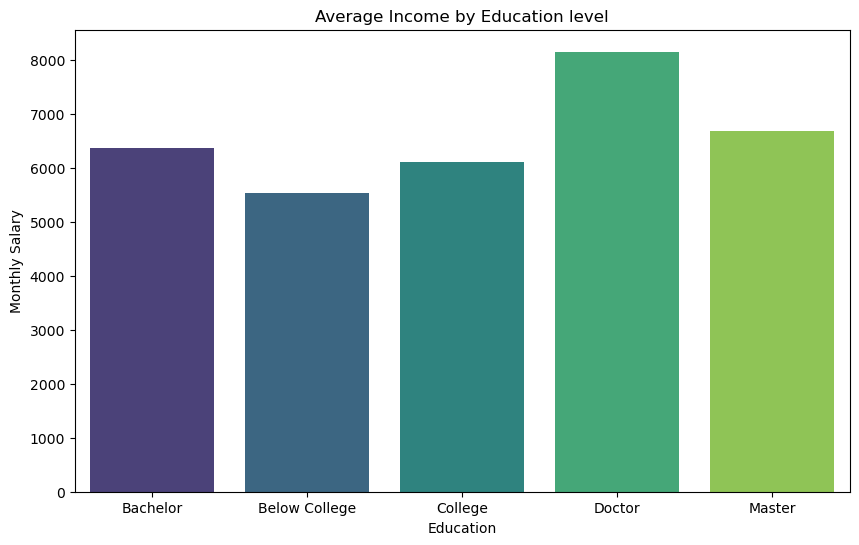

In [45]:
#### 7. Average monthly income by Education level:

# Calculate the average monthly income by education level
Avg_income_education_level = final_data.groupby('Education')['MonthlySalary'].mean().reset_index()

# plot the bar chart

plt.figure(figsize = (10,6))
sns.barplot(x = 'Education' , y = 'MonthlySalary' , data = Avg_income_education_level , palette= 'viridis')
plt.title("Average Income by Education level")
plt.xlabel("Education")
plt.ylabel("Monthly Salary")
plt.show()

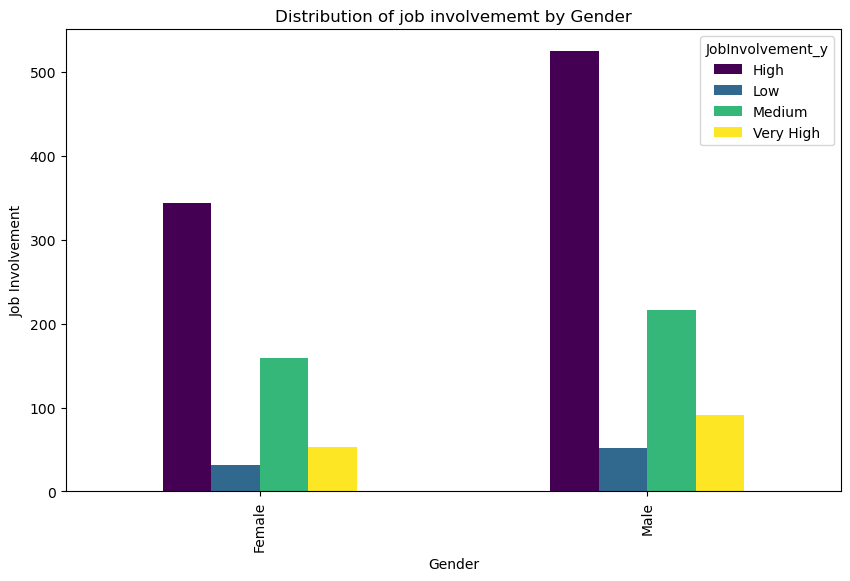

In [46]:
#### 8. Distribution of job involvement by Gender:

# Calculate the count of job involvement levels by gender
Job_involvement_by_gender = final_data.groupby('Gender')['JobInvolvement_y'].value_counts().unstack().fillna(0)

# plot the bar chart:

Job_involvement_by_gender.plot(kind = 'bar' , stacked = False, figsize = (10,6) , colormap = 'viridis')
plt.title("Distribution of job involvememt by Gender")
plt.xlabel("Gender")
plt.ylabel("Job Involvement")
plt.show()

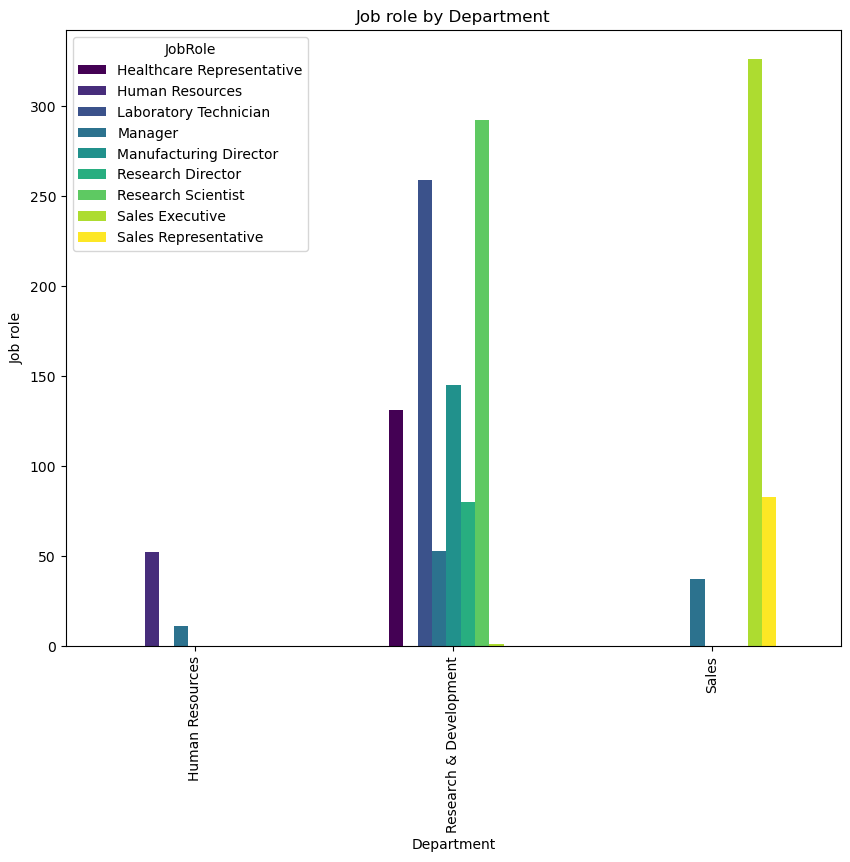

In [48]:
#### 9. Distribution of Job role by Department:

# Calculate the count of job roles by department
Job_role_by_department = final_data.groupby('Department')['JobRole'].value_counts().unstack().fillna(0)

# plot the bar chart:

Job_role_by_department.plot(kind = 'bar' , stacked = False , figsize = (10,8) , colormap = 'viridis')
plt.title("Job role by Department")
plt.xlabel("Department")
plt.ylabel("Job role")
plt.show()

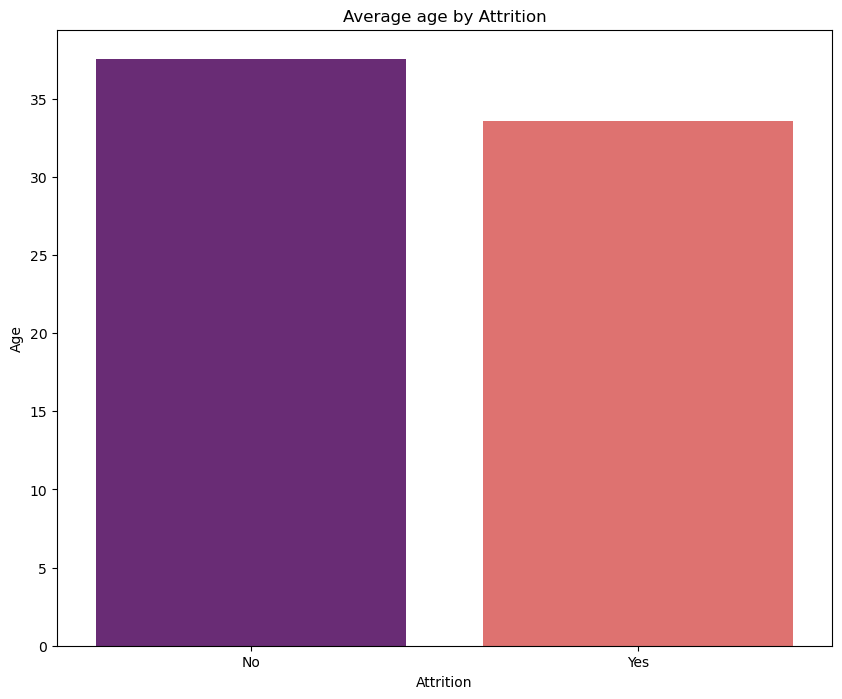

In [50]:
#### 10. Average age by attrition status:

# Calculate the average age by attrition status
Avg_age_by_attrition = final_data.groupby('Attrition')['Age'].mean().reset_index()

# plot the bar chart:

plt.figure(figsize = (10,8))
sns.barplot(x = 'Attrition' , y = 'Age' , data = Avg_age_by_attrition , palette= 'magma')
plt.title("Average age by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.show()